sort Numerical values function# Data Mining Challenge 2020

## Team
* First-name Last-name Student-ID
* ...



# section one 
apply the desired libraries 

In [88]:
import pandas as pd
import numpy as np

# Statistical libraries
from scipy import stats

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Evaluation Procedures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Classification methods
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.ensemble import VotingClassifier

# Evaluation Metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [89]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif,chi2

In [90]:
from sklearn.preprocessing import power_transform

In [91]:
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE

from sklearn.decomposition import PCA

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Section two
Defin the functions that we will use through out our code 

This function print all the datas 

In [92]:
def print_all (to_print):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        print(to_print)

prints the number of number of columns without any outliers

In [93]:
def print_clean_col(X_in,mean,std):
    lower = mean - 3*std
    upper = mean + 3*std
    i=0
    for col in X_in.columns:
        outliers = ((X_in[col]>upper[col]) | (X_in[col]<lower[col])).astype(int)
        
        if (outliers.sum()>0):
            print("Variable %s (%.3f,%.3f) has %d outliers"%(col,mean[col],std[col],outliers.sum()))
        else:
            i+=1
    print('the number of cleaned columns are ', i)

Replace outliers with their upper or lower band 

In [94]:
def replace_outliers(S,mean,std):
    X =S.copy()
    lower = mean - 3*std
    upper = mean + 3*std
    for col in X.columns:
        X.loc[X[col]>upper[col], col] = upper[col]
        X.loc[X[col]<lower[col], col] = lower[col]
    
    return X

sort Numerical values function

In [95]:
# sort Numerical values function
def sorted_m3_numerical_values(numerical_df, reverse = True):
    sorted_Numerical_df = numerical_df.reindex(sorted(numerical_df.columns, reverse=reverse), axis=1)
    sorted_Numerical_columns_list = (list(sorted_Numerical_df.columns))
    New_Numerical_columns_list = []
    for column in sorted_Numerical_columns_list:
        New_column = column.replace('_',' ')
        New_Numerical_columns_list.append(New_column)

    New_Numerical_columns_list.sort(key=lambda s: s.split()[1])

    sorted_Numerical_columns_list.clear()
    for column in New_Numerical_columns_list:
        New_column = column.replace(' ','_')
        sorted_Numerical_columns_list.append(New_column)

    #drop the dataframe
    sorted_Numerical_df = sorted_Numerical_df.iloc[0:0]

    sorted_Numerical_df = numerical_df[sorted_Numerical_columns_list]
    return sorted_Numerical_df


This method receive a coorelation an df as input and check if  two features  have a correlation higher than 0.9 or not

In [96]:
# This method receive a coorelation an df as input and check if  two features  have a correlation higher than 0.9 or not
def compare_corr_values(corr, df_):
  columns = np.full((corr.shape[0],), True, dtype=bool)
  for i in range(corr.shape[0]):
      for j in range(i+1, corr.shape[0]):
          if corr.iloc[i,j] >= 0.84:
              if columns[j]:
                  columns[j] = False
  selected_columns = df_.columns[columns]
  df_ = df_[selected_columns]
  return df_

This method normalize a data set. it can return a `Numpy` *array* if set `return_df` to `True` a dataframe on default. Also it can do 2 types of normalization you can set `is_standard` to `False` so you can have `MinMaxScaler`, or `StandardScaler` by default.

In [97]:
def normalizer_df(df, return_df = False, is_standard = True, range_to_put = (-1, 1)):
    df = df.copy()
    st_x= StandardScaler()
    norm_x = MinMaxScaler(feature_range = range_to_put)
    if is_standard:
        if return_df:
            df[df.columns] = st_x.fit_transform(df[df.columns])
            return df
        else:
            return st_x.fit_transform(df)
    else:
        if return_df:
            df[df.columns] = norm_x.fit_transform(df[df.columns])
            return df
        else:
            return norm_x.fit_transform(df)

This method helps up to evaluate a baseline performance. it takes a model and inputs and outputs and provides us with a metric

In [98]:
def evaluate_model_baseLine(model, X_in,y_in):
    variance_model = LogisticRegression()
    variance_scores = cross_val_score(model, X_in, y_in, cv=kfolds)
    print("Variance Model R2 Mean %.3f StdDev %.3f"%(variance_scores.mean(),variance_scores.std()))

# Section Three 
Apply data preprocessing we can see that the categorical datas are already One-Hot encoded 

### 3.1 loading the data

`Notice` google drive 

In [99]:
# Loading the DATA  for Daniel, 
#Don't use it if you don't want to mount your google drive with google colab
# from google.colab import drive
# drive.mount('/content/drive',force_remount=Truimport os 
# cwd = os.getcwd()
# dataset_dir = os.path.join(cwd, 'DMTMDataset')
# #train_df=pd.read_csv(os.path.join(dataset_dir,'train.csv'))
# dataset_direction='/content/drive/MyDrive/DMTMDataset/'
# train_df=open(os.path.join(dataset_direction,'train.csv'))
# df=pd.read_csv((train_df))
# dfe)


In [100]:
df = pd.read_csv('/Users/tara/Documents/OneDrive - Politecnico di Milano/Polimi/polimiFourthSemester/DMTM/project/test.csv')

### 3.2 Data Quality assurnace 
we should check for:

3.2.1- null and missing values 

3.2.2- inconsistant values 

3.2.3- duplicates

In [101]:
# check for the null 
df.isnull().sum().sum()

0

we see that there are no NaN values

In [102]:
print_all(df.dtypes)

SITE_ID                                  int64
DATE                                    object
CELL_TYPE_Macro                          int64
CELL_TYPE_Mobil                          int64
CELL_TYPE_TRP                            int64
CELL_TYPE_Tx site                        int64
CELL_TYPE_micro                          int64
N_TRANSPORTED_SITES                    float64
GEOGRAPHIC_CLUSTER_K_0                   int64
GEOGRAPHIC_CLUSTER_K_1                   int64
GEOGRAPHIC_CLUSTER_K_2                   int64
GEOGRAPHIC_CLUSTER_K_3                   int64
GEOGRAPHIC_CLUSTER_K_4                   int64
GEOGRAPHIC_CLUSTER_K_5                   int64
GEOGRAPHIC_CLUSTER_K_6                   int64
GEOGRAPHIC_CLUSTER_K_7                   int64
GEOGRAPHIC_CLUSTER_K_8                   int64
GEOGRAPHIC_CLUSTER_K_9                   int64
aircon_sum_wo_prev7d                   float64
aircon_sum_wo_prev14d                  float64
mean_temperature_prev7d                float64
max_temperatu

we want to check if the data inside a column are all from the same type and we don't have irrelevant values

In [103]:
# remove the duplicates if any 
df = df.drop_duplicates()

In [104]:
# drop the unused columns
df = df.drop(columns=['SITE_ID','DATE'])

Now we check for inconsistent values
First we take the range and variance for each column 

In [105]:
col_max = df.max(axis=0)

In [106]:
col_min = df.min(axis=0)

In [107]:
df_range = col_max - col_min


In [122]:
print_all(df_range.sort_values())

ge_min_persistance_prev7d                  0.00
CELL_TYPE_TRP                              0.00
fire/smoke_min_persistance_prev7d          0.00
CELL_TYPE_Macro                            1.00
GEOGRAPHIC_CLUSTER_K_9                     1.00
GEOGRAPHIC_CLUSTER_K_8                     1.00
GEOGRAPHIC_CLUSTER_K_7                     1.00
GEOGRAPHIC_CLUSTER_K_6                     1.00
GEOGRAPHIC_CLUSTER_K_4                     1.00
GEOGRAPHIC_CLUSTER_K_5                     1.00
GEOGRAPHIC_CLUSTER_K_2                     1.00
GEOGRAPHIC_CLUSTER_K_1                     1.00
GEOGRAPHIC_CLUSTER_K_0                     1.00
CELL_TYPE_micro                            1.00
CELL_TYPE_Tx site                          1.00
CELL_TYPE_Mobil                            1.00
GEOGRAPHIC_CLUSTER_K_3                     1.00
skew_fire/smoke_alarms_prev14d             2.92
kurt_fire/smoke_alarms_prev14d             3.92
aircon_sum_wo_prev7d                       4.00
skew_temperature_alarms_prev14d         

we see that CELL_TYPE_TRP is always zero so it is useless to have it in our datas so we drop it

In [108]:
df = df.drop(columns = ['CELL_TYPE_TRP'])

In [109]:
df_mean = df.mean()

In [110]:
df_var = df.var()

In [111]:
df_std = df.std()

Data can be inconsistent if there is an irrelevant value so we should print all of them to se if there is some inconsistency 

In [112]:
df_sem = df.sem()

from the statistics above we can understand that it is possible that we have outliers so first we check if there is any Inconsistentcy in the types of the data and then we plot to understand better how can we remove the outliers 

As we can see there are no inconsistentcies in the types sp we continue with data visualisation 

### 3.3 Data visualisation

In here first we try to visualize our data and understand better their distribution

array([[<AxesSubplot:title={'center':'CELL_TYPE_Macro'}>,
        <AxesSubplot:title={'center':'CELL_TYPE_Mobil'}>,
        <AxesSubplot:title={'center':'CELL_TYPE_Tx site'}>,
        <AxesSubplot:title={'center':'CELL_TYPE_micro'}>,
        <AxesSubplot:title={'center':'N_TRANSPORTED_SITES'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_0'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_1'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_2'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_3'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_4'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_5'}>],
       [<AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_6'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_7'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_8'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_9'}>,
        <AxesSubplot:title={'center':'aircon_sum_wo_p

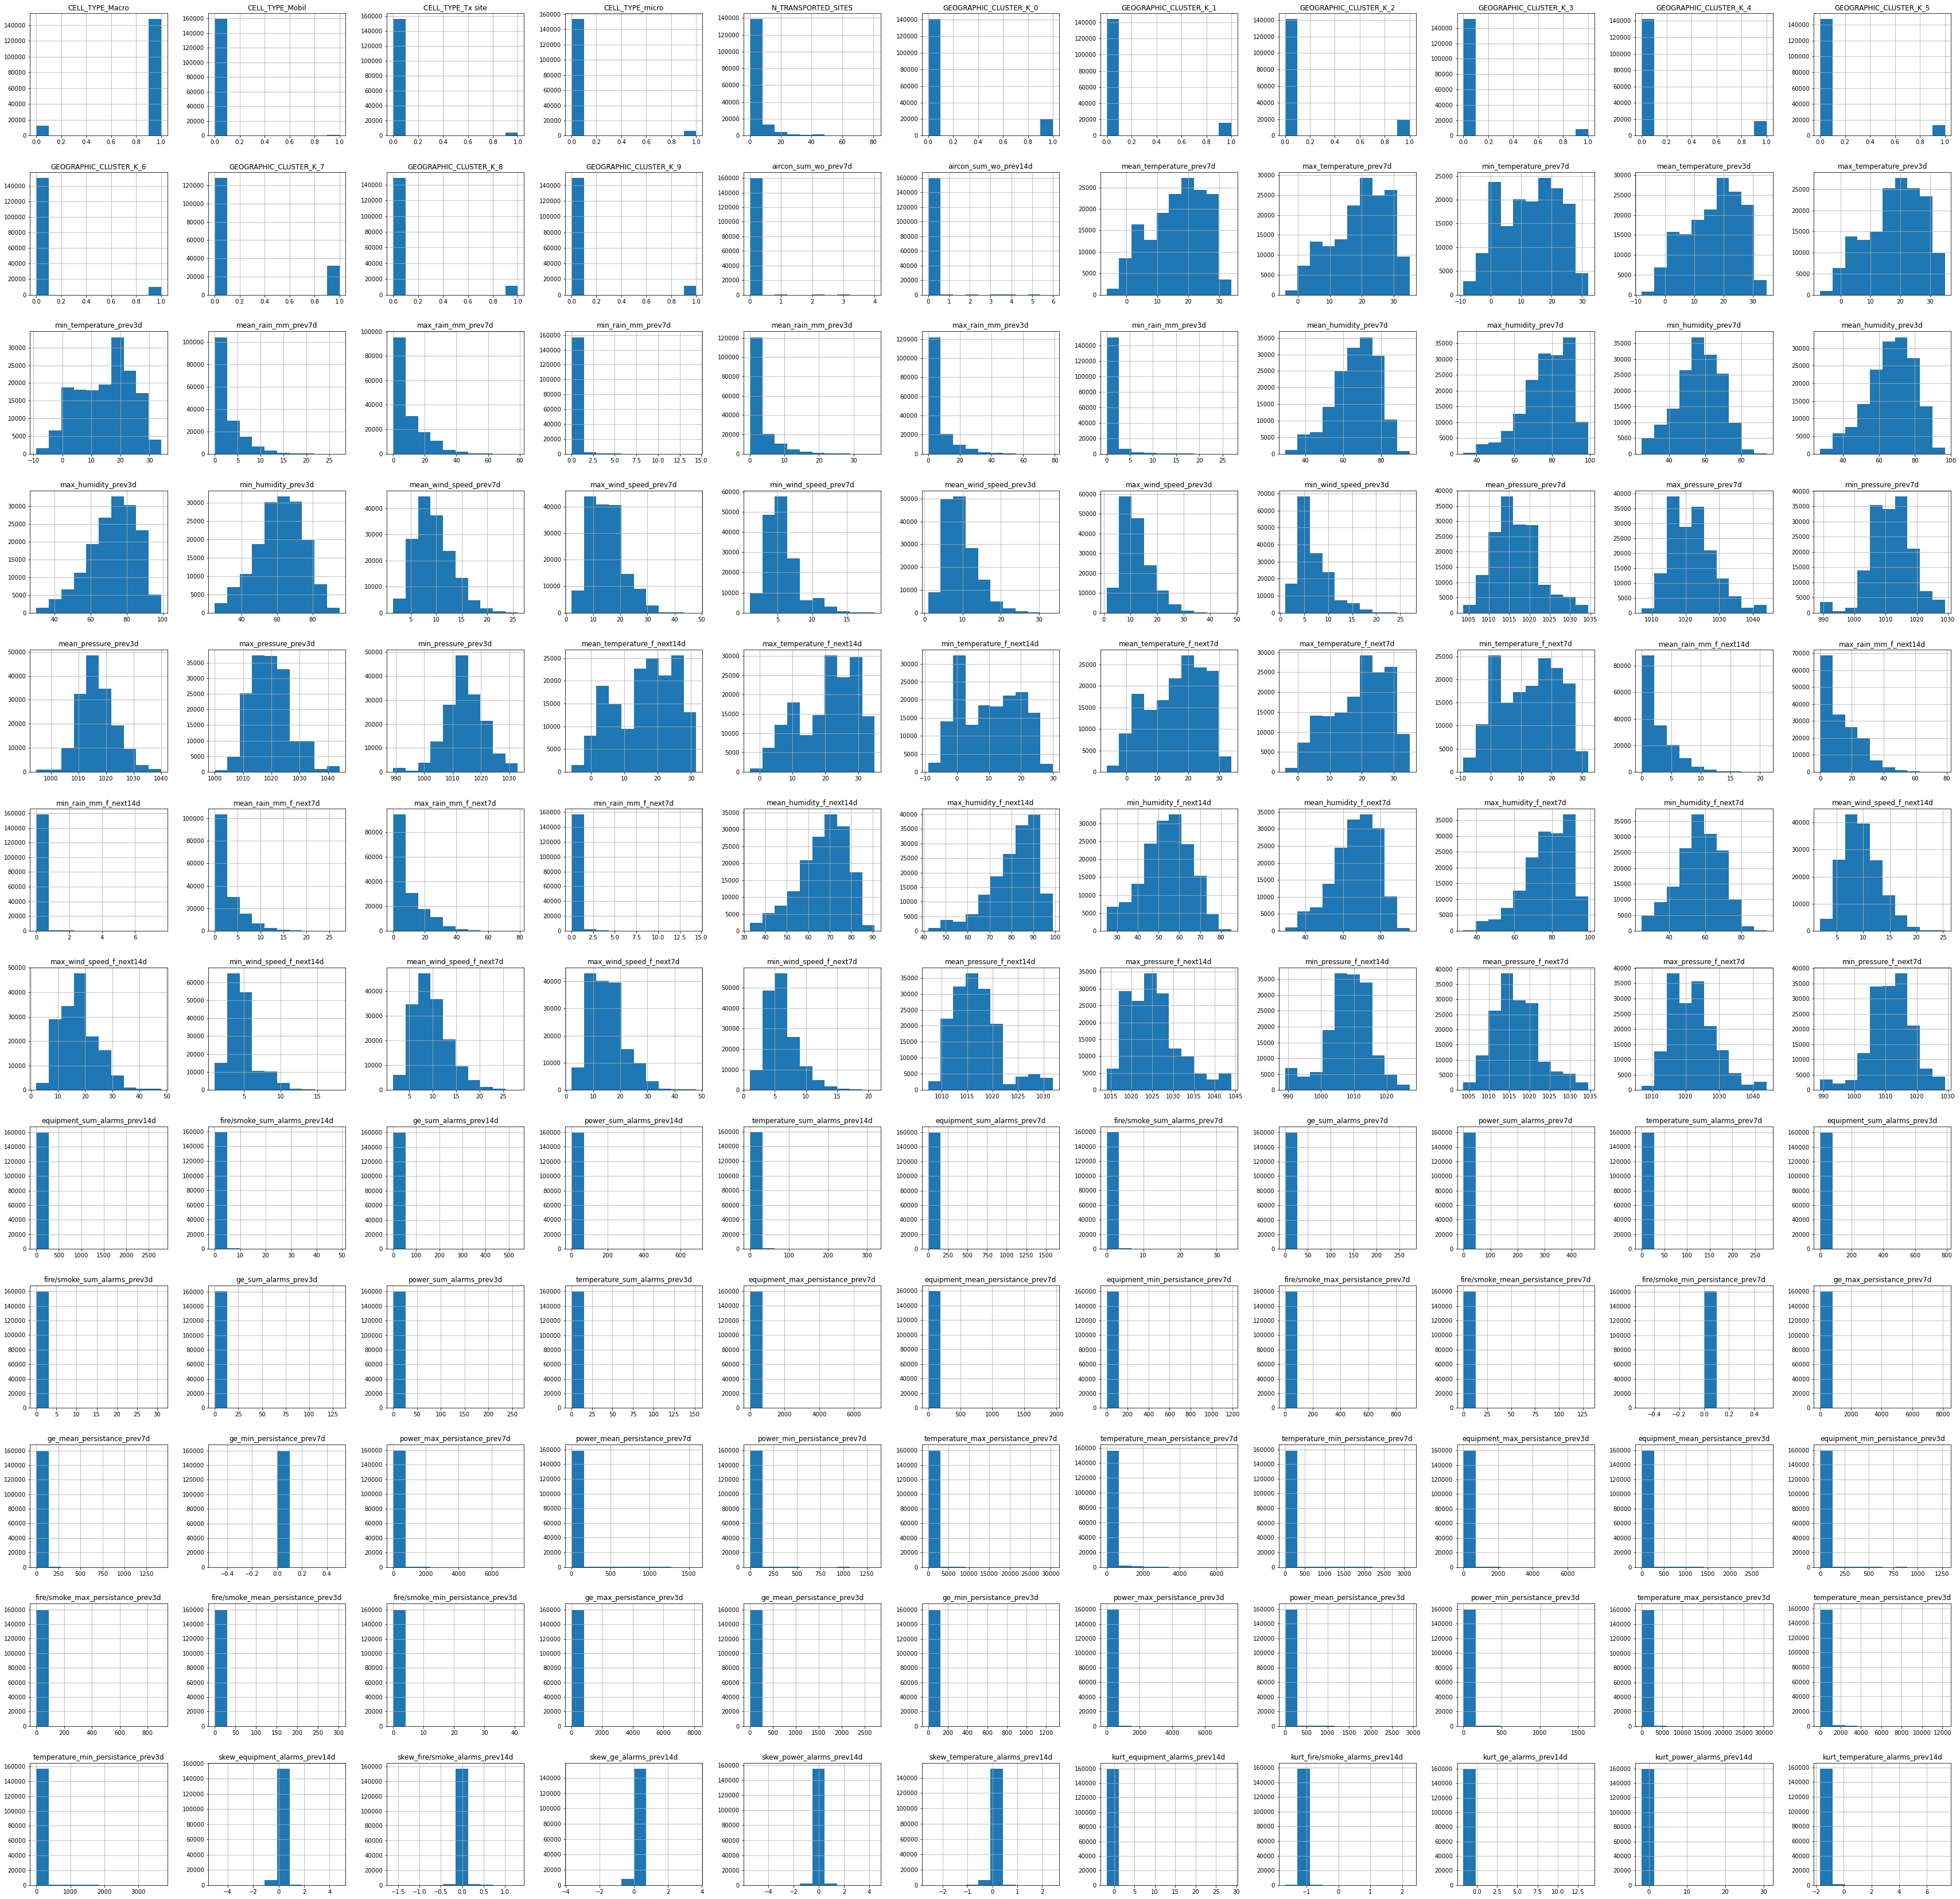

In [113]:
df.hist(figsize = (60,60))

as we can see in the data visualization part we have different types of distributions for our data.

### 3.4 OutLier Analysis

for our analysis as we anticipated before we should Separate our data and group them by their types of Distribution. 

In [114]:
categorical_df = pd.concat([df.loc[: ,'CELL_TYPE_Macro':'CELL_TYPE_micro'], df.loc[: ,'GEOGRAPHIC_CLUSTER_K_0':'GEOGRAPHIC_CLUSTER_K_9']], axis = 1)
aircon_sum_wo_df = df.loc[:, 'aircon_sum_wo_prev7d' : 'aircon_sum_wo_prev14d']
n_transported_sites = df.loc[:,'N_TRANSPORTED_SITES']

In [115]:
df.head()

,CELL_TYPE_Macro,CELL_TYPE_Mobil,CELL_TYPE_Tx site,CELL_TYPE_micro,N_TRANSPORTED_SITES,GEOGRAPHIC_CLUSTER_K_0,GEOGRAPHIC_CLUSTER_K_1,GEOGRAPHIC_CLUSTER_K_2,GEOGRAPHIC_CLUSTER_K_3,GEOGRAPHIC_CLUSTER_K_4,...,skew_equipment_alarms_prev14d,skew_fire/smoke_alarms_prev14d,skew_ge_alarms_prev14d,skew_power_alarms_prev14d,skew_temperature_alarms_prev14d,kurt_equipment_alarms_prev14d,kurt_fire/smoke_alarms_prev14d,kurt_ge_alarms_prev14d,kurt_power_alarms_prev14d,kurt_temperature_alarms_prev14d
0,1,0,0,0,10.0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.21,-1.212308,-1.21,-1.21
1,1,0,0,0,10.0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.21,-1.212308,-1.21,-1.21
2,1,0,0,0,10.0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.21,-1.212308,-1.21,-1.21
3,1,0,0,0,10.0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.21,-1.212308,-1.21,-1.21
4,1,0,0,0,10.0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.21,-1.212308,-1.21,-1.21


In [116]:
#Sort alarm's correlated columns 
sorted_sum_alarm_df = df.loc[: , 'equipment_sum_alarms_prev14d':'temperature_sum_alarms_prev3d']
sorted_sum_alarm_df = sorted_sum_alarm_df.reindex(sorted(sorted_sum_alarm_df.columns, reverse=True), axis=1)## alarms

#Sort persistance's correlated columns
sorted_persistance_df = (df.loc[:, 'equipment_max_persistance_prev7d': 'temperature_min_persistance_prev3d'])
sorted_persistance_df = sorted_persistance_df.reindex(sorted(sorted_persistance_df.columns, reverse=True), axis=1)## persistance


#sort Numerical's  columns 
sorted_numerical_df = df.loc[: , 'mean_temperature_prev7d':'min_pressure_f_next7d']## Numerical
sorted_numerical_df = sorted_m3_numerical_values(sorted_numerical_df) 

#Skewness and Kurt
skew_cat_alarms_prev14d = df.loc[:,'skew_equipment_alarms_prev14d': 'skew_temperature_alarms_prev14d']
kurt_cat_alarms_prev14d = df.loc[:,'kurt_equipment_alarms_prev14d': 'kurt_temperature_alarms_prev14d']
skwurt = pd.concat([skew_cat_alarms_prev14d,kurt_cat_alarms_prev14d],axis=1)### Skewness and kurt together

all_numerical_df = pd.concat([sorted_numerical_df,sorted_sum_alarm_df,sorted_persistance_df,skwurt],axis=1)

array([[<AxesSubplot:title={'center':'skew_equipment_alarms_prev14d'}>,
        <AxesSubplot:title={'center':'skew_fire/smoke_alarms_prev14d'}>,
        <AxesSubplot:title={'center':'skew_ge_alarms_prev14d'}>],
       [<AxesSubplot:title={'center':'skew_power_alarms_prev14d'}>,
        <AxesSubplot:title={'center':'skew_temperature_alarms_prev14d'}>,
        <AxesSubplot:title={'center':'kurt_equipment_alarms_prev14d'}>],
       [<AxesSubplot:title={'center':'kurt_fire/smoke_alarms_prev14d'}>,
        <AxesSubplot:title={'center':'kurt_ge_alarms_prev14d'}>,
        <AxesSubplot:title={'center':'kurt_power_alarms_prev14d'}>],
       [<AxesSubplot:title={'center':'kurt_temperature_alarms_prev14d'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

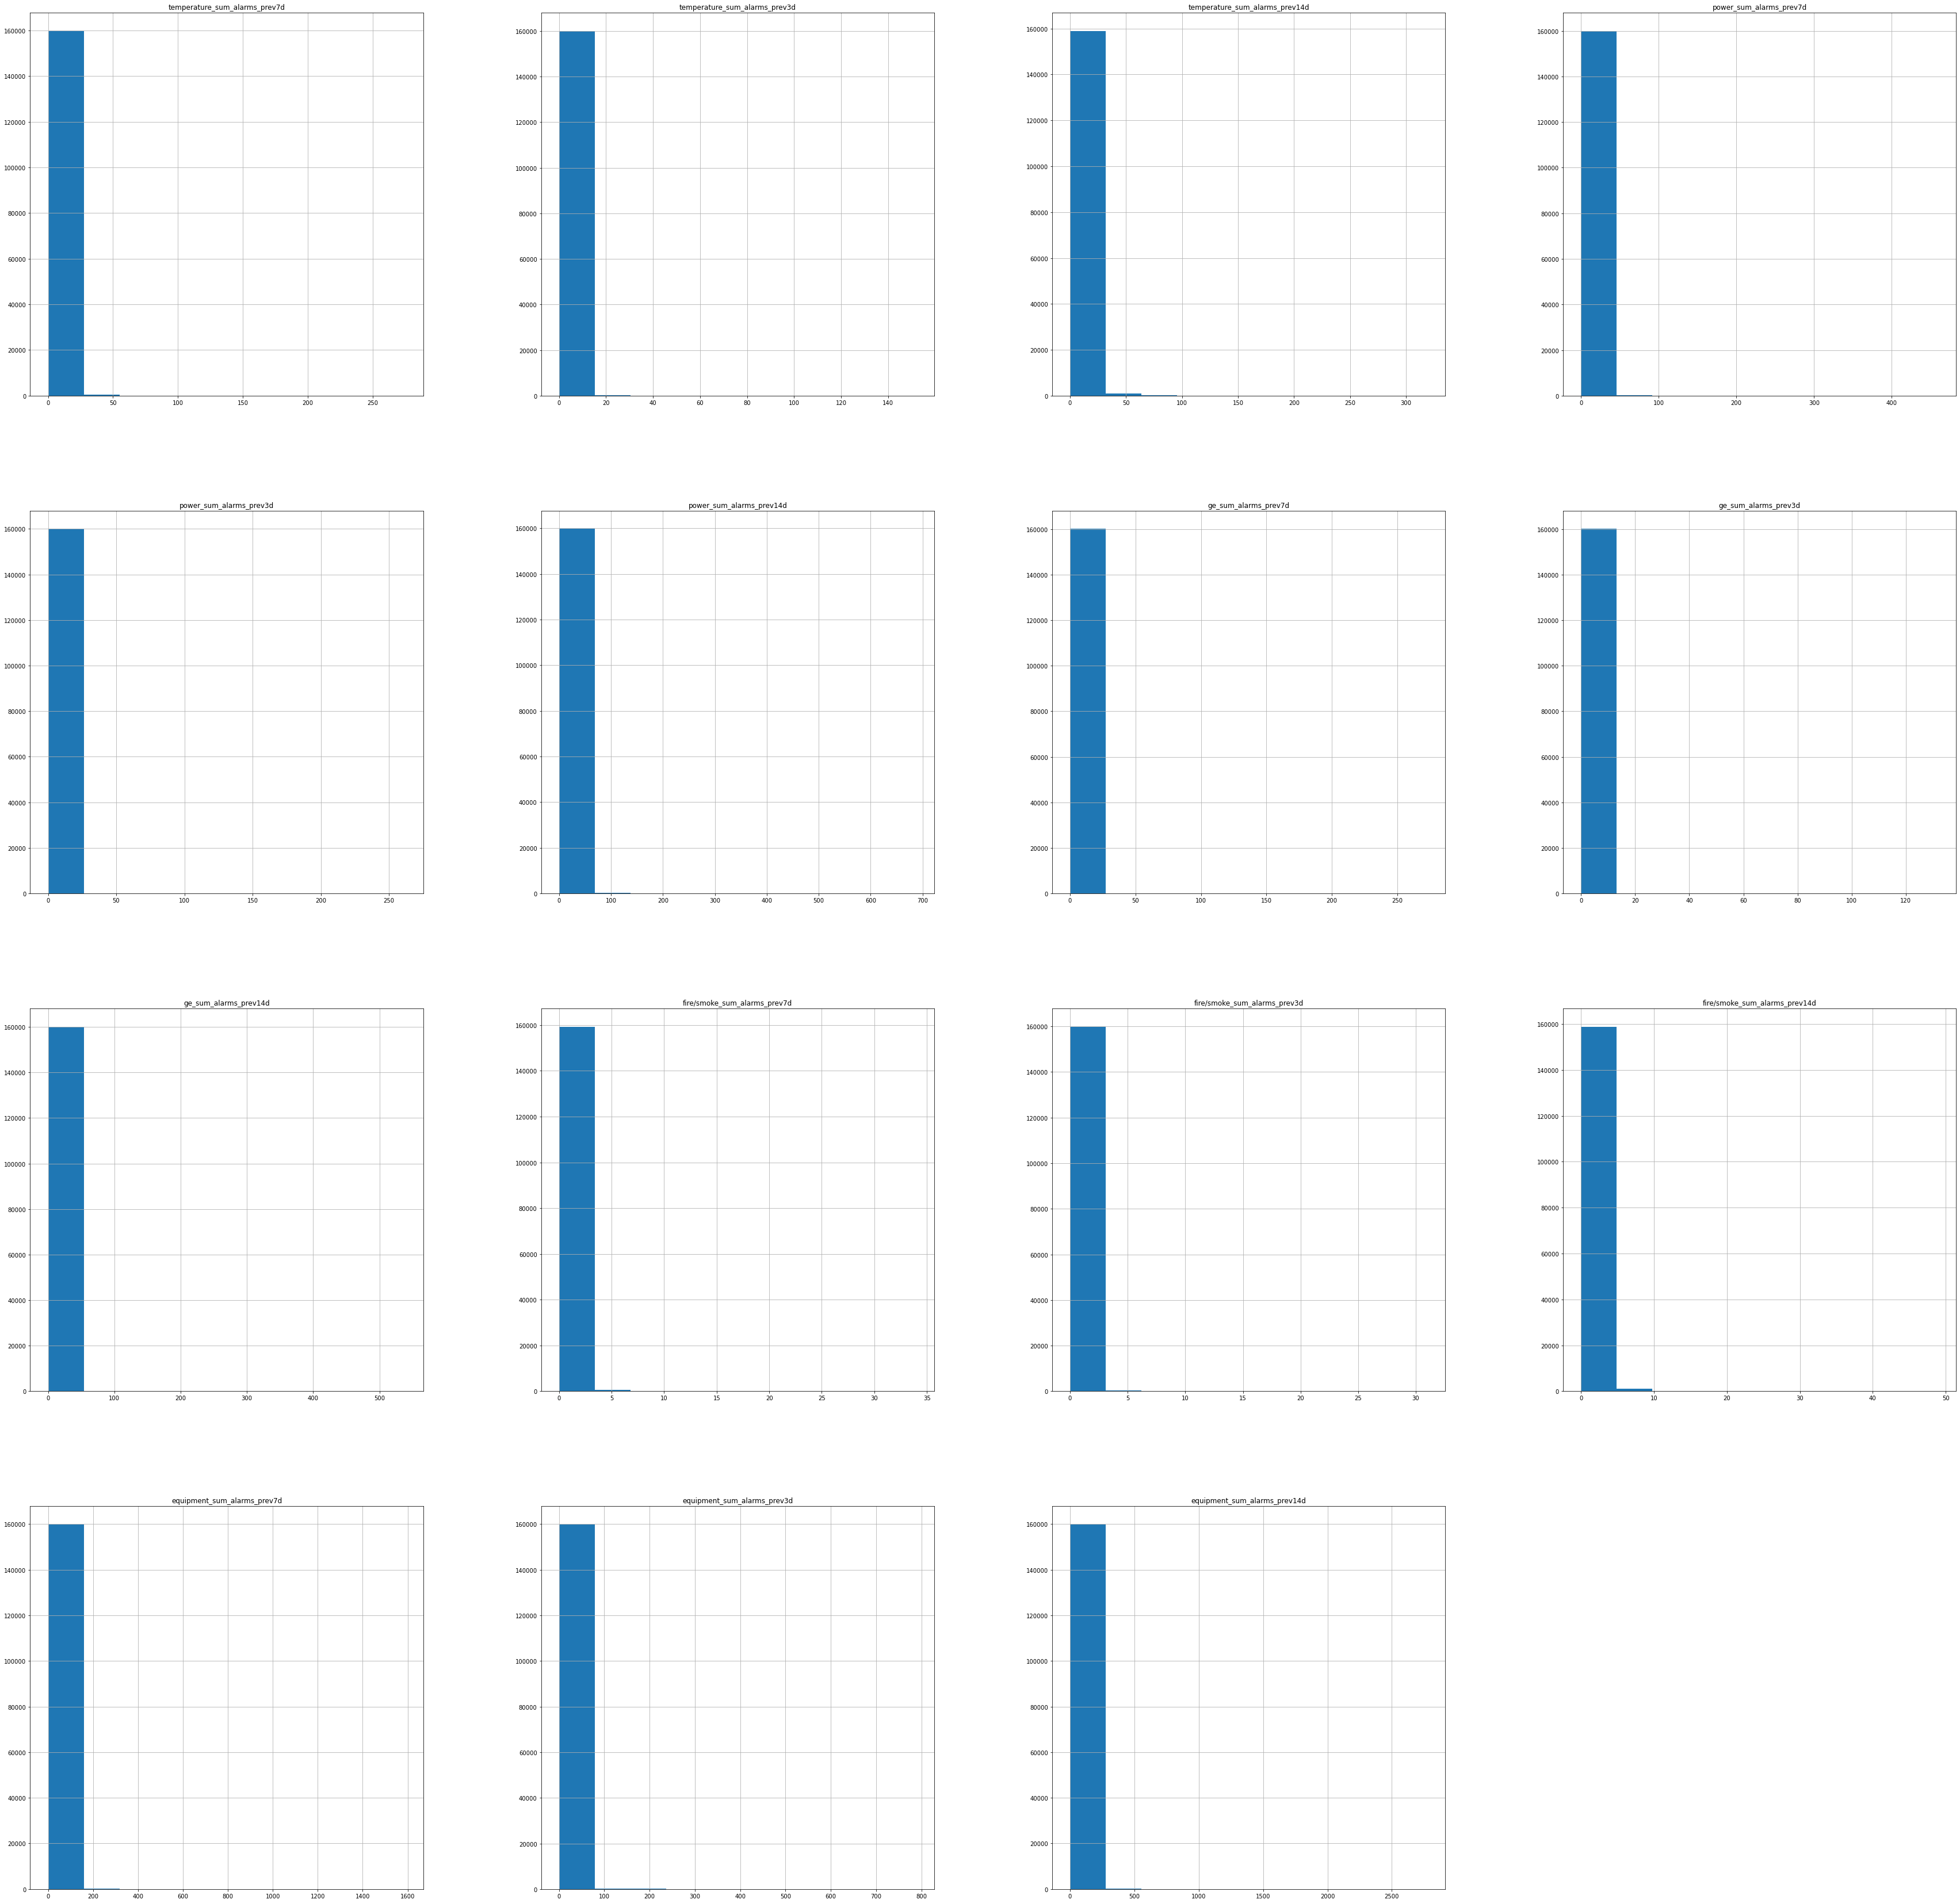

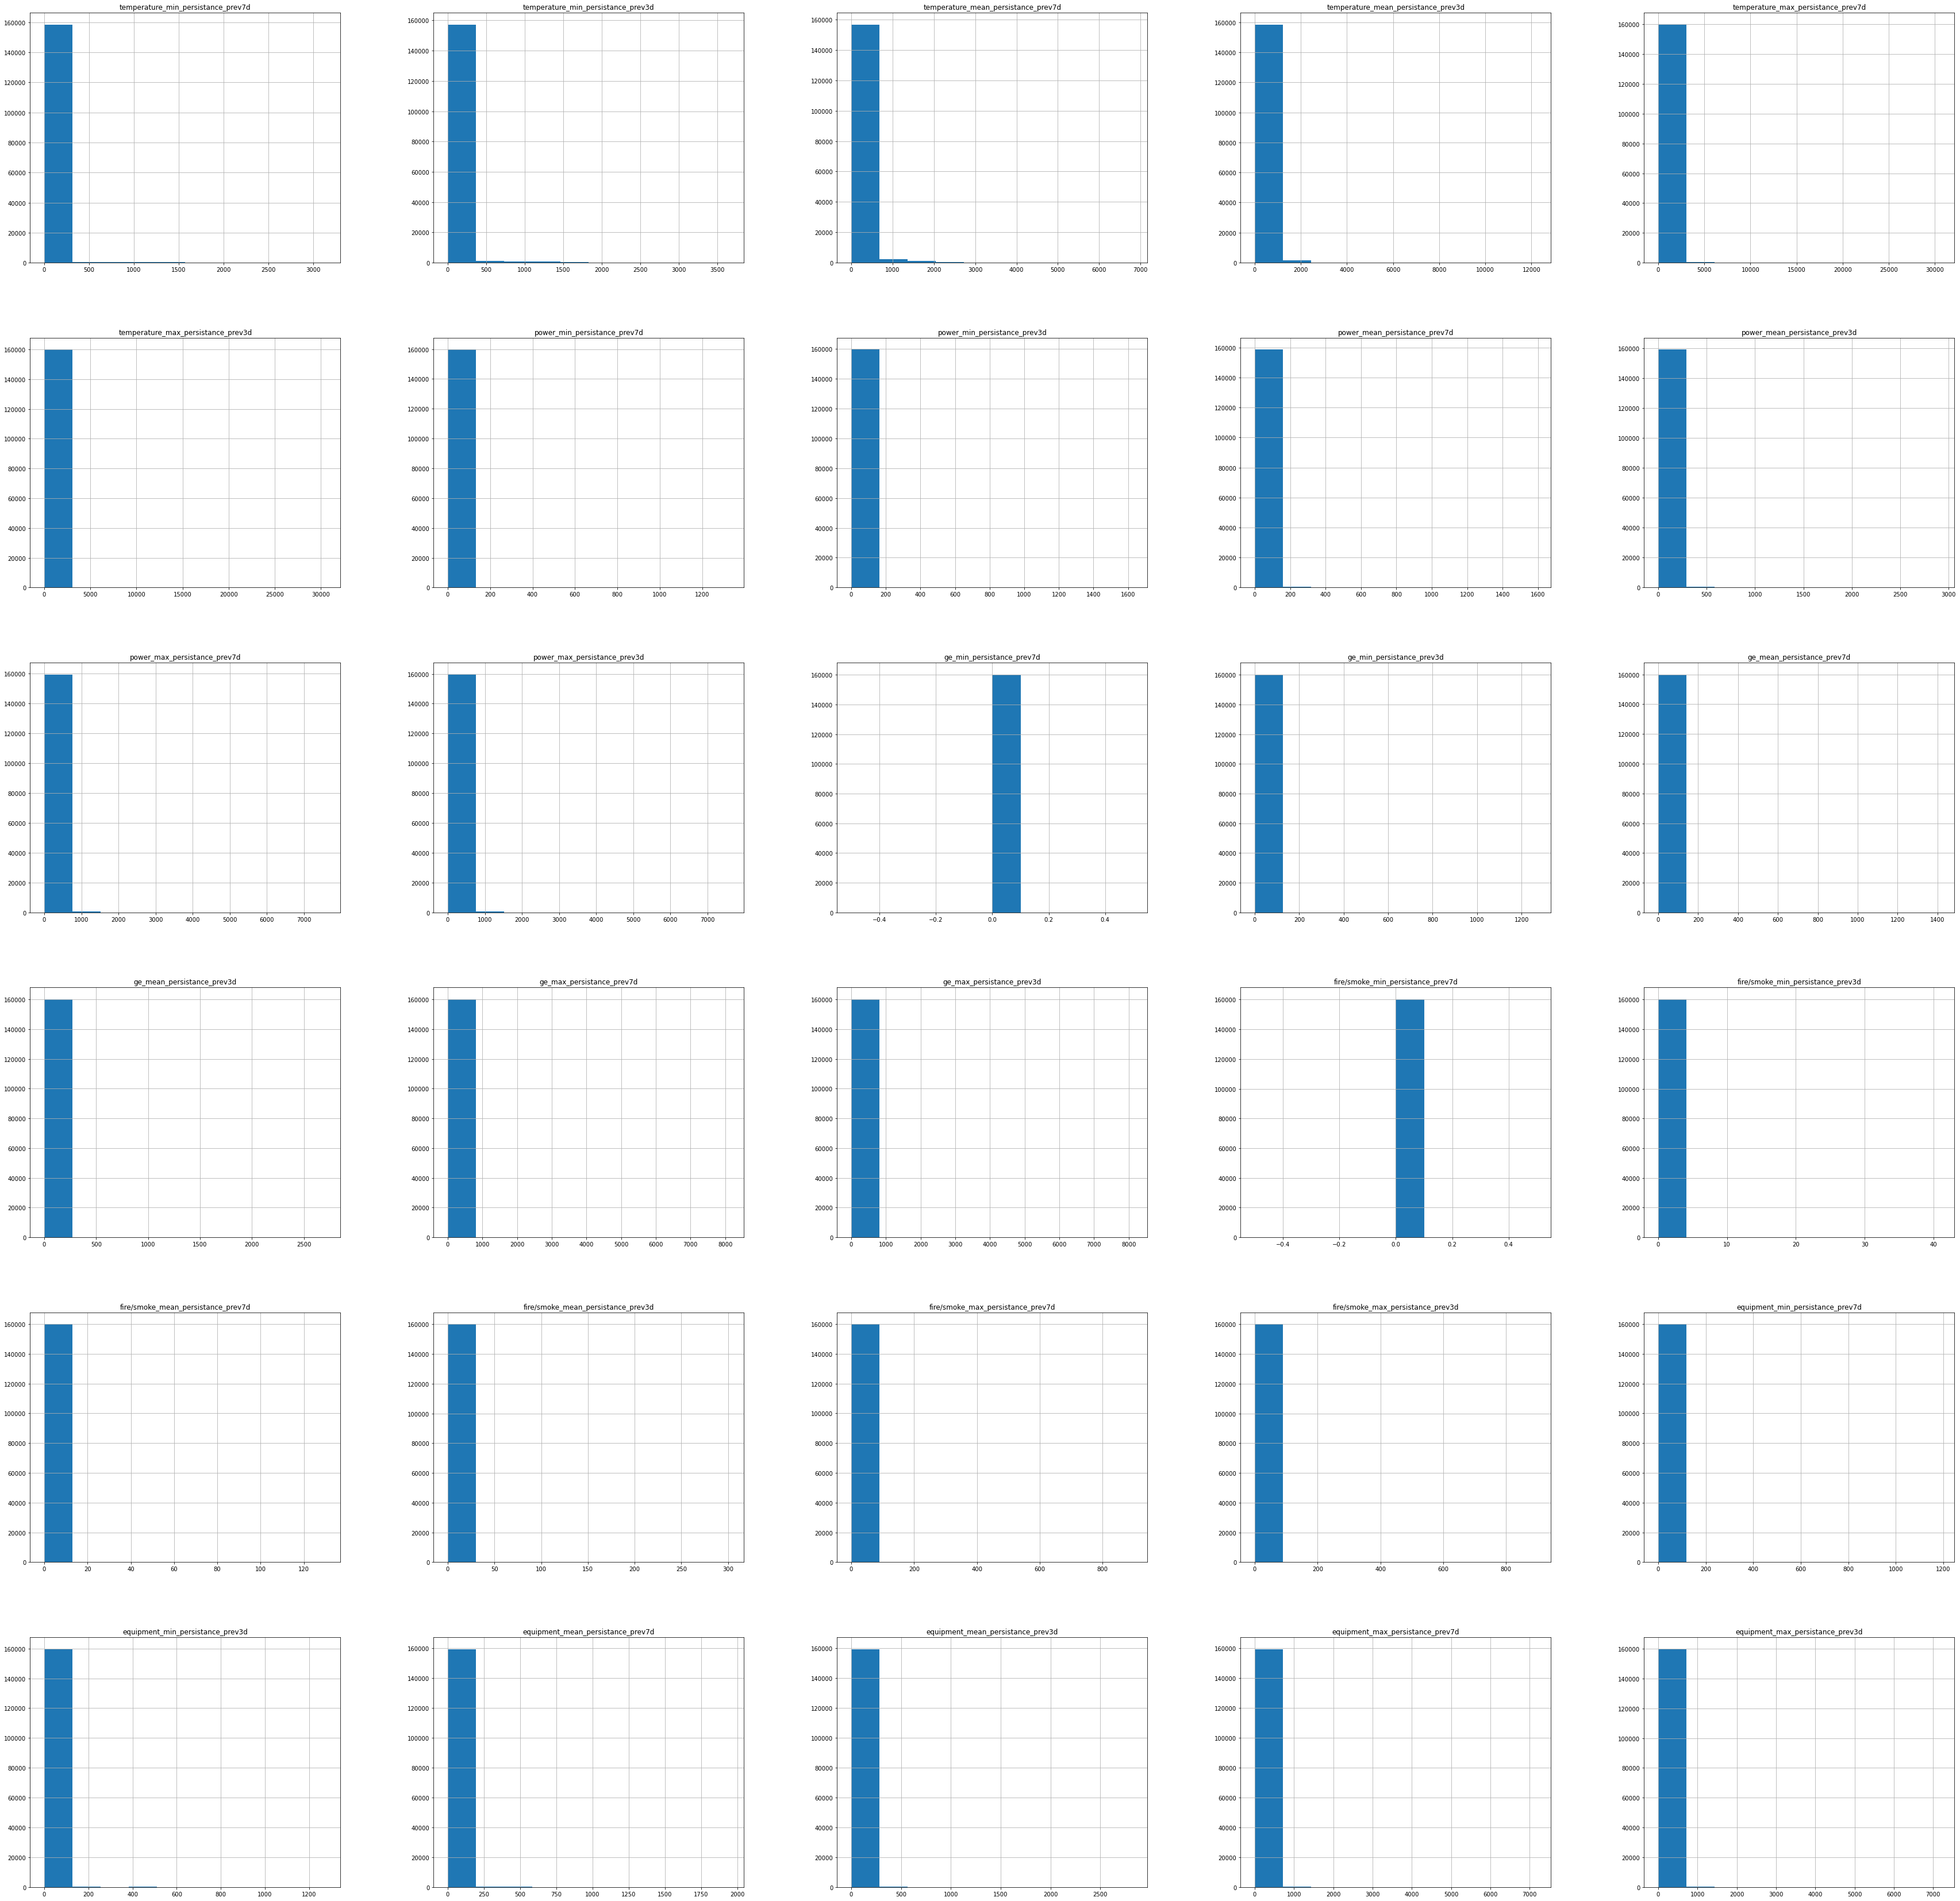

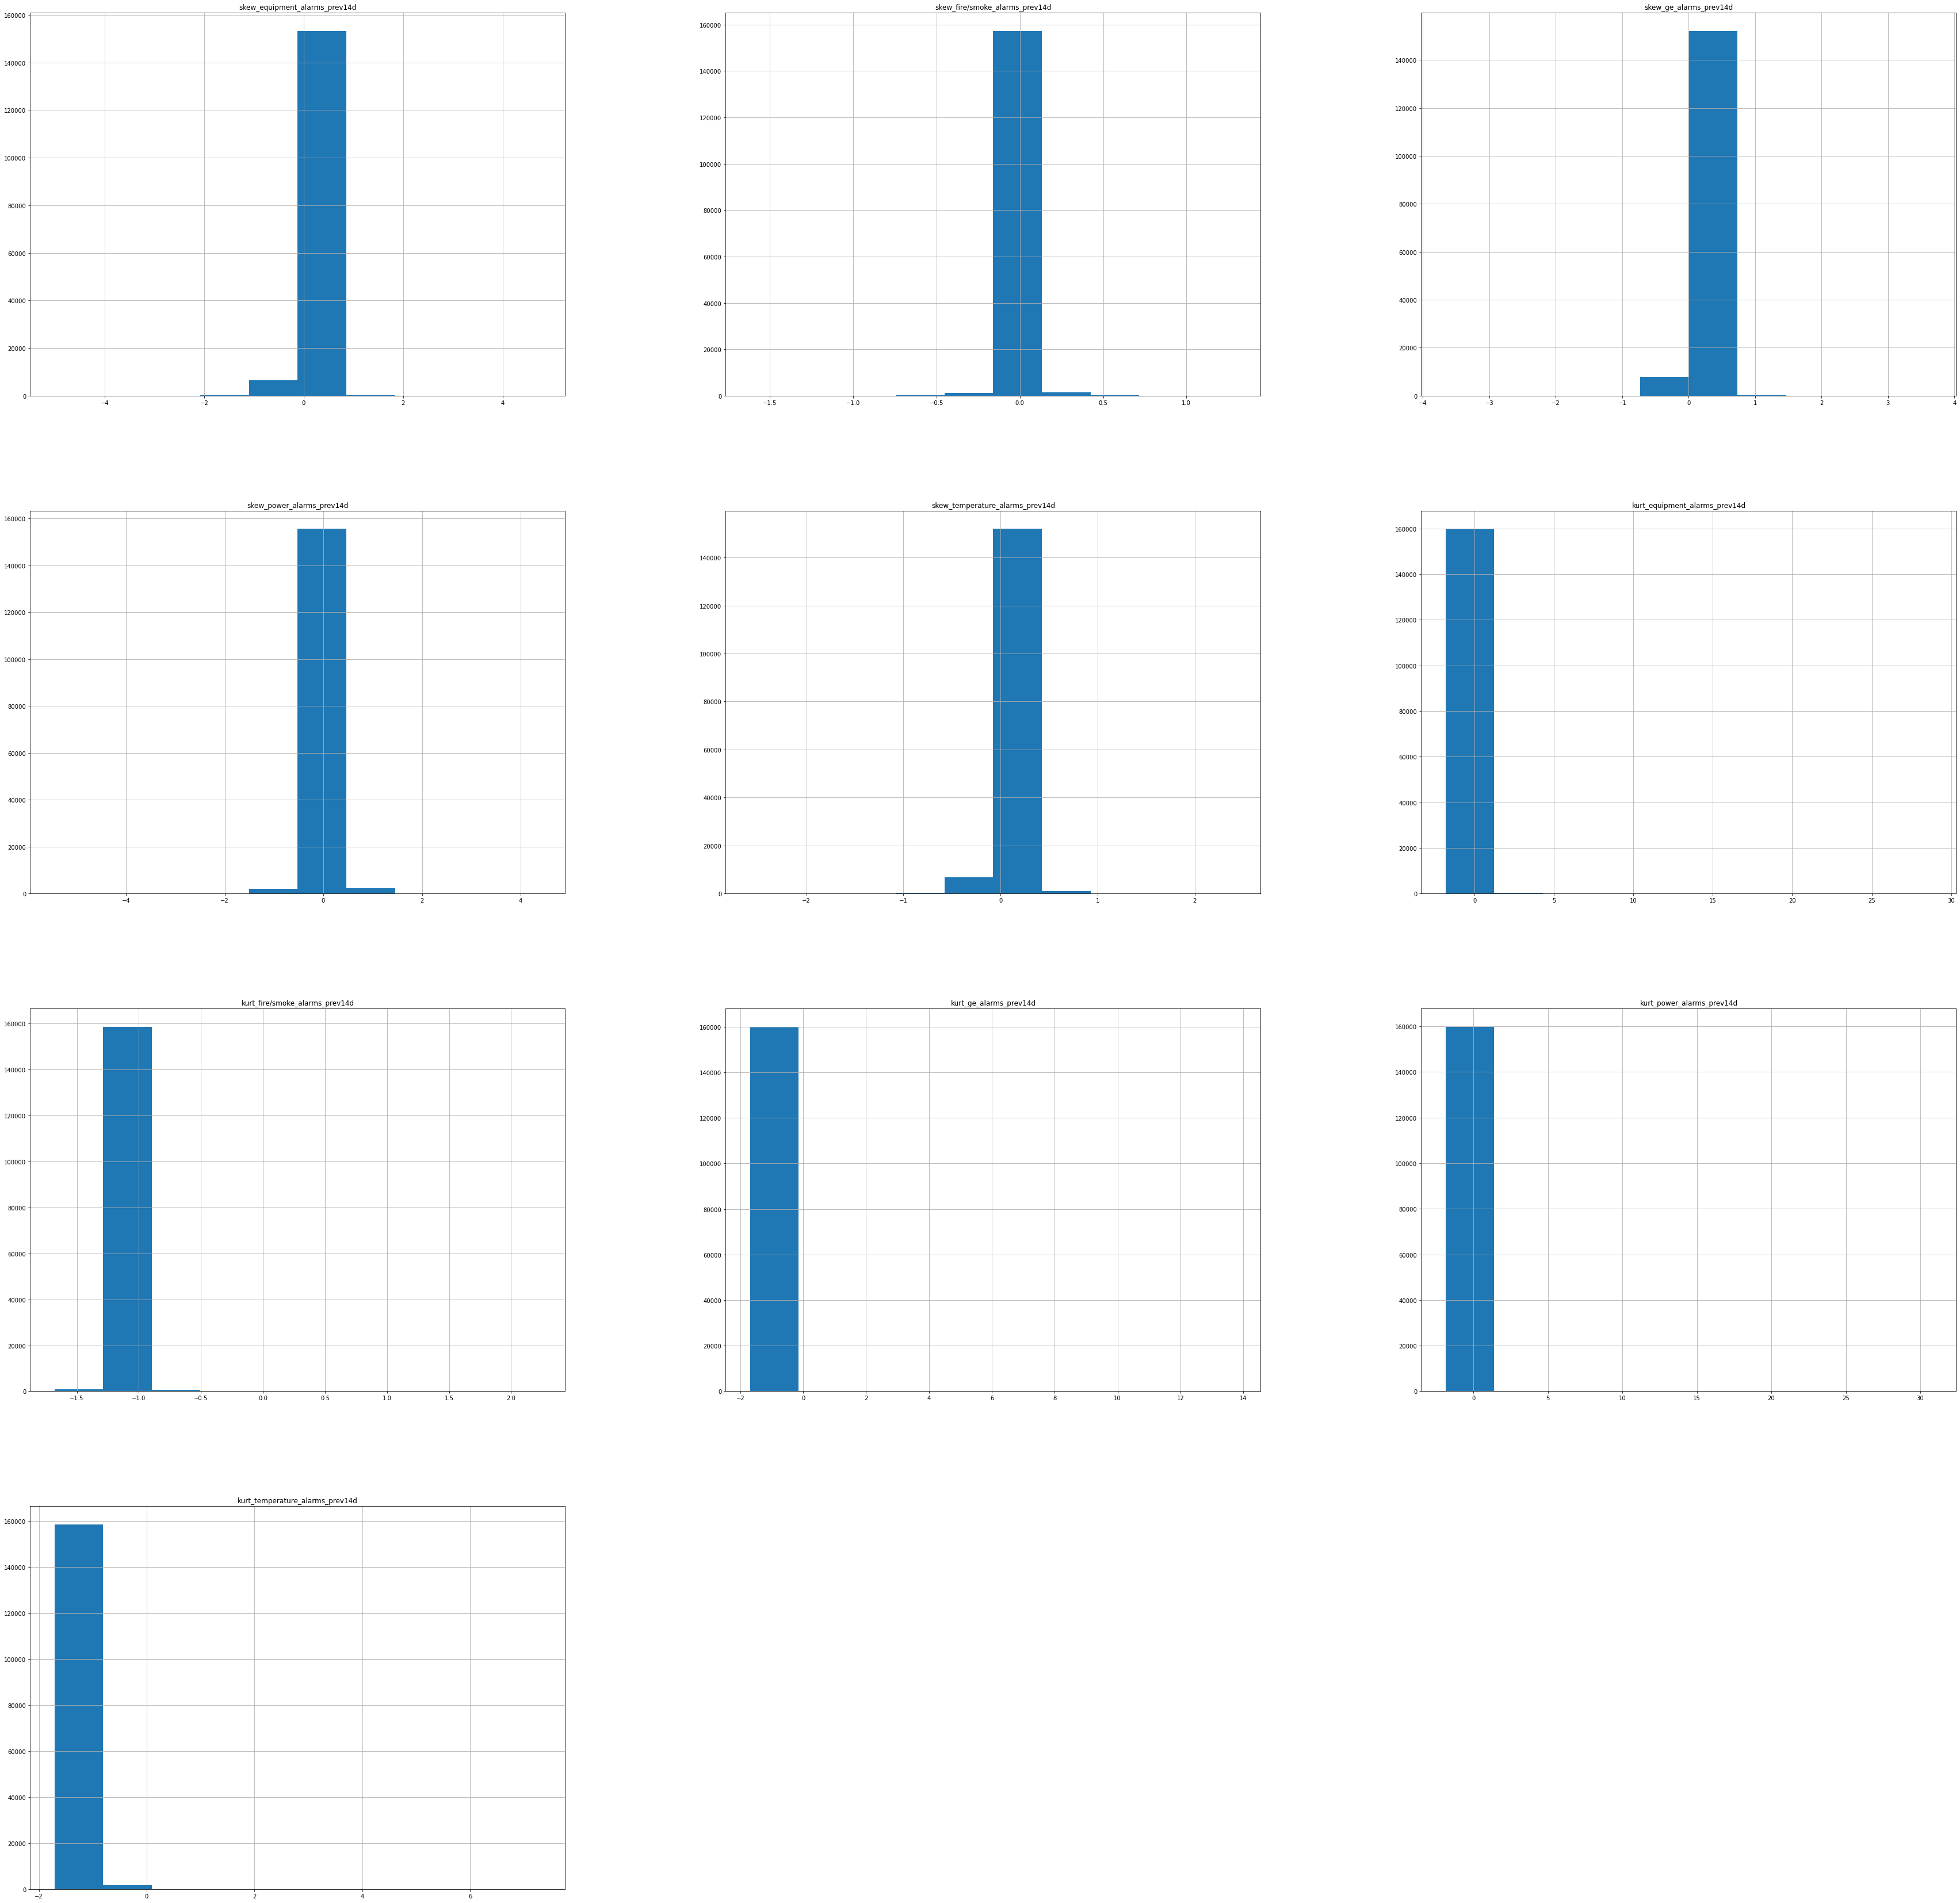

In [117]:
sorted_sum_alarm_df.hist(figsize = (60,60))
sorted_persistance_df.hist(figsize = (60,60))
skwurt.hist(figsize = (60,60))

we can see these types of distribution associated to these group are some how normal so we can use a power transform to make them guassian like

In [118]:
all_numerical_df_np = power_transform(all_numerical_df, method = 'yeo-johnson')

/Users/tara/anaconda3/envs/data-mining-test/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [119]:
n_transported_sites_np = power_transform(all_numerical_df, method = 'yeo-johnson')

NameError: name 'ower_transform' is not defined

after the transformation we get a numpy array we need to convert it again to a data frame

In [ ]:
all_numerical_df = pd.DataFrame(all_numerical_df_np, columns = all_numerical_df.columns)

In [ ]:
all_numerical_df.hist(figsize=(60,60))

In [ ]:
all_numerical_df_mean = all_numerical_df.mean()
all_numerical_df_std = all_numerical_df.std()

In [ ]:
all_numerical_df = replace_outliers(all_numerical_df, all_numerical_df_mean, all_numerical_df_std)

In [ ]:
print_clean_col(all_numerical_df, all_numerical_df_mean, all_numerical_df_std)

As you can see almost all outliers are deleted

In [ ]:
#Sort alarm's correlated columns 
sorted_sum_alarm_df = all_numerical_df.loc[: , 'temperature_sum_alarms_prev7d':'equipment_sum_alarms_prev14d' ]
# sorted_sum_alarm_df = sorted_sum_alarm_df.reindex(sorted(sorted_sum_alarm_df.columns, reverse=False), axis=1)## alarms

#Sort persistance's correlated columns
sorted_persistance_df = all_numerical_df.loc[:, 'temperature_min_persistance_prev7d': 'equipment_max_persistance_prev3d']
# sorted_persistance_df = sorted_persistance_df.reindex(sorted(sorted_persistance_df.columns, reverse=False), axis=1)## persistance


#sort Numerical's  columns 
sorted_numerical_df = all_numerical_df.loc[: , 'min_humidity_prev7d':'max_wind_speed_f_next14d']## Numerical
# sorted_numerical_df = sorted_m3_numerical_values(sorted_numerical_df, False) 

#Skewness and Kurt
skew_cat_alarms_prev14d = all_numerical_df.loc[:,'skew_equipment_alarms_prev14d': 'skew_temperature_alarms_prev14d']
kurt_cat_alarms_prev14d = all_numerical_df.loc[:,'kurt_equipment_alarms_prev14d': 'kurt_temperature_alarms_prev14d']
skwurt = pd.concat([skew_cat_alarms_prev14d,kurt_cat_alarms_prev14d],axis=1)### Skewness and kurt together

### 3.5 Feature Aggregation 

This results in reduction of memory consumption and processing time
Aggregations provide us with a high-level view of the data as the behaviour of groups or aggregates is more stable than individual data objects

Now that we don't have outliers anymore we should try to reduce the number of features that we have.

***Saeid inja tozihat bnvis k chikara kardi***

In [ ]:
# copy
snv = sorted_numerical_df.copy()
index = 0
counter = len(snv.columns)

#create an empty celane_df_ to save pruned numerical feature
pruned_num_df = snv.iloc[0:0, 0:0]

while(index < counter):
    i = 0
    cl = snv.iloc[:, index:index+4]
    pruned_num_df['ind_'+snv.columns[index]] = ((cl.iloc[:,i]/7) + (cl.iloc[:,i+1]/3) + (cl.iloc[:, i+2]/7) + (cl.iloc[:, i+3]/14))* 3/2

    index+=4

pruned_num_df

after pruning we get the correlation between variables here we see that we can remove the very cirrelated features

*just as an idea between the highly correlated features we can kepp the one with the highest covariance*

In [ ]:
pruned_num_cov=pd.concat([pruned_num_df], axis=1).corr(method='pearson')
plt.figure(figsize = (10,10))
sns.heatmap(pruned_num_cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

we compare the correlation between features and remove one of two features that have a correlation higher than 0.85

In [ ]:
pruned_num_df = compare_corr_values(pruned_num_cov, pruned_num_df)

In [ ]:
pruned_num_df_cov=pd.concat([pruned_num_df], axis=1).corr(method='pearson')
plt.figure(figsize = (10,10))
sns.heatmap(pruned_num_df_cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

In this step we are going to prune the cat_m3_persistance_prevXd data and reduce the features. To do this we assing a weight to each Xdays (3day = 1/3, 7day = 1/7, 14day = 1/14

In [ ]:
spd = sorted_persistance_df
index = 0
counter = len(spd.columns)

#create an empty celane_df_ to save pruned persistance feature
pruned_persistance_df = spd.iloc[0:0, 0:0]

while(index < counter):
    i = 0
    cl = spd.iloc[:, index:index+2]
    pruned_persistance_df['ind_'+spd.columns[index]] = ((cl.iloc[:,i]/7) + (cl.iloc[:,i+1]/3)) * 2.1

    index+=2

pruned_persistance_df

In [ ]:
pruned_persistance_cov=pd.concat([pruned_persistance_df], axis=1).corr(method='pearson')
plt.figure(figsize = (15,15))
sns.heatmap(pruned_persistance_cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

we compare the correlation between features and remove one of two features that have a correlation higher than 0.85

In [ ]:
pruned_persistance_df = compare_corr_values(pruned_persistance_cov, pruned_persistance_df)

In [ ]:
pruned_persistance_cov=pd.concat([pruned_persistance_df], axis=1).corr(method='pearson')
plt.figure(figsize = (8,8))
sns.heatmap(pruned_persistance_cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

In [ ]:
concat = pd.concat([pruned_persistance_df,pruned_num_df], axis=1)

For aggregating the number of alarm associated to the pre14 prev7 prev3 days we need to use the kurt and skew measures simce they are not normaliaze we need to normalize them

In [ ]:
normalized_kurt_cat_alarms_prev14d = normalizer_df(kurt_cat_alarms_prev14d,True,False)
normalized_skew_cat_alarms_prev14d = normalizer_df(skew_cat_alarms_prev14d,True,False)

In [ ]:
sorted_sum_alarm_df_cov=pd.concat([sorted_sum_alarm_df], axis=1).corr(method='pearson')
plt.figure(figsize = (18,18))
sns.heatmap(sorted_sum_alarm_df_cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

as we can see some of the features are highly correlated to each other so using skurt and skew we want to combine them together

In [ ]:
sorted_sum_alarm_df = sorted_sum_alarm_df.copy()
sorted_sum_alarm_df_agg = sorted_sum_alarm_df.iloc[0:0, 0:0]
for i in range(len(normalized_kurt_cat_alarms_prev14d.columns)):

    lentype = len(sorted_sum_alarm_df.columns)-i*3
    kurt = normalized_kurt_cat_alarms_prev14d.iloc[:,i]
    skew = normalized_skew_cat_alarms_prev14d.iloc[:,i]
    name = sorted_sum_alarm_df.iloc[:,lentype-2].name
    sorted_sum_alarm_df_agg.loc[((kurt <= 0 )| (kurt >= -1)) & 
                            ((skew <= -0.2) | (skew >= -1)), 
                            'aggregated_'+name] = (14*sorted_sum_alarm_df.iloc[:,lentype-2] + 
                                                        3*sorted_sum_alarm_df.iloc[:,lentype-3] + 
                                                        7*sorted_sum_alarm_df.iloc[:,lentype-4])/(14+3+7)
    sorted_sum_alarm_df_agg.loc[((skew <= -0.2) | (skew >= 0.2)), 
                            'aggregated_'+name] = (7*sorted_sum_alarm_df.iloc[:,lentype-2] + 
                                                        7*sorted_sum_alarm_df.iloc[:,lentype-3] + 
                                                        14*sorted_sum_alarm_df.iloc[:,lentype-4])/(14+7+7)
    sorted_sum_alarm_df_agg.loc[((kurt <= 0 )| (kurt >= 1)) & 
                            ((skew <= -0.2) | (skew >= -1)), 
                            'aggregated_'+name] = (14*sorted_sum_alarm_df.iloc[:,lentype-2] + 
                                                        1*sorted_sum_alarm_df.iloc[:,lentype-3] + 
                                                        2*sorted_sum_alarm_df.iloc[:,lentype-4])/(14+2+1)
    sorted_sum_alarm_df_agg.loc[((kurt <= 0 )| (kurt >= -1)) & 
                            ((skew <= 0.2) | (skew >= 1)), 
                            'aggregated_'+name] = (3*sorted_sum_alarm_df.iloc[:,lentype-2] + 
                                                        3*sorted_sum_alarm_df.iloc[:,lentype-3] + 
                                                        14*sorted_sum_alarm_df.iloc[:,lentype-4])/(14+3+3)
    sorted_sum_alarm_df_agg.loc[((kurt <= 0 )| (kurt >= 1)) & 
                            ((skew <= 0.2) | (skew >= 1)), 
                            'aggregated_'+name] = (2*sorted_sum_alarm_df.iloc[:,lentype-2] + 
                                                        14*sorted_sum_alarm_df.iloc[:,lentype-3] + 
                                                        3*sorted_sum_alarm_df.iloc[:,lentype-4])/(14+3+2)
    

In [ ]:
sorted_sum_alarm_df_cov=pd.concat([sorted_sum_alarm_df_agg], axis=1).corr(method='pearson')
plt.figure(figsize = (18,18))
sns.heatmap(sorted_sum_alarm_df_cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

In [ ]:
concat_df = pd.concat([categorical_df, aircon_sum_wo_df, concat, sorted_sum_alarm_df_agg, skwurt], axis = 1)

In [ ]:
concat_df.describe()

In [ ]:
concat_df.to_csv("concat_df.csv", index = False)

we now save this to a new csv to avoid doing all the step above for each iteration

### 3.5 Feature Selection 

First we should have a baseline performance to see our progress after each feature selection and select the best one

we start with loading our aggreagated and cleaned data

In [6]:
cleaned_df = pd.read_csv("concat_df.csv")

In [7]:
# defining the targer and input
target_variable = 'aircon_sum_target_next14d'
input_variables = cleaned_df.columns[cleaned_df.columns!=target_variable]
X_origin_df = cleaned_df[input_variables]
y_origin_df = cleaned_df[target_variable]

In [9]:
X_origin_np = np.array(X_origin_df)
y_origin_np = np.array(y_origin_df)

In [10]:
#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X_origin_df, y_origin_df, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(434910, 47) (186390, 47)


#### 3.5.1 Random Sampling 
we can see that the data is highly imbalanced. There are two approaches to deal with imbalanced data

**3.5.1 A:** Under sampling. In this approach we under sample the majority class to match minority class

**3.5.1 B:** Over sampling. In this approach we over sample the minirity class but duplicating them and adding small changes to them to match with the majority class


In [11]:
concat_df_tran = pd.concat([X_train,y_train], axis = 1)

In [12]:
# Class count
count_class_0, count_class_1 = y_train.value_counts()
print(count_class_0, count_class_1)

432391 2519


***Under Sampling***

Random under-sampling:
1    2519
0    2519
Name: aircon_sum_target_next14d, dtype: int64


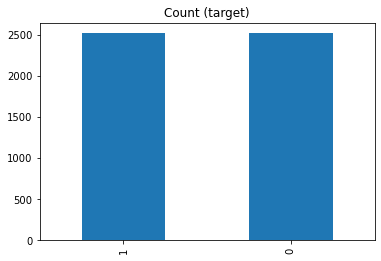

In [13]:
# Divide by class
df_class_0 = concat_df_tran[concat_df_tran[target_variable] == 0]
df_class_1 = concat_df_tran[concat_df_tran[target_variable] == 1]
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under[target_variable].value_counts())

df_test_under[target_variable].value_counts().plot(kind='bar', title='Count (target)');

In [34]:
def evaluate_base_line(df_in, features = input_variables, should_use_samples = False):
    if should_use_samples:
        X = features
    else:
        X = df_in[features]
    X = np.array(X)
    X = normalizer_df(X)
    y = np.array(df_in[target_variable])
    kfolds = KFold(10,shuffle=True,random_state=0)
    model = linear_model.LogisticRegression(max_iter = 300)
    scores = cross_val_score(model, X, y, scoring='f1_weighted', cv=kfolds, n_jobs=-1)

    print("f1 Mean %.3f StdDev %.3f"%(scores.mean(),scores.std()))
    

In [35]:
evaluate_base_line(df_test_under)

f1 Mean 0.713 StdDev 0.028


In [16]:
kfolds = KFold(10,shuffle=True,random_state=0)

we can see with under sampling techniques we have loss of information so we should try over sampling with more Sophisticated methods for this reason we take help from python and scikit learn libraries

In [17]:
from sklearn.utils import resample

#Over-sample Minority Class
#1) Separate majority and minority classes
df_majority = concat_df_tran[concat_df_tran[target_variable]==0] #"target" is the name of the target column, change it accordingly to your dataset
df_minority = concat_df_tran[concat_df_tran[target_variable]==1] #"target" is the name of the target column, change it accordingly to your dataset
 
#2) Oversample minority class
df_minority_oversampled = resample(df_minority, 
                                   replace=True,
                                   n_samples=100000,     # number of samples into the minority class (change it accordingly to your dataset)
                                   random_state=123)  # reproducible results
 
#3) Combine oversampled minority class with majority class
df_oversampled = pd.concat([df_minority_oversampled, df_majority])
 
#4) Display new class counts
df_oversampled[target_variable].value_counts() #"target" is the name of the target column, change it accordingly to your dataset

0    432391
1    100000
Name: aircon_sum_target_next14d, dtype: int64

In [36]:
evaluate_base_line(df_oversampled)

f1 Mean 0.812 StdDev 0.002


#### 3.5.1 Random Forest
We now apply a random forest and use its scoring to select the attributes. we apply this on the original data without sampling

In [19]:
forest = ExtraTreesRegressor(n_estimators=250, random_state=0)
forest.fit(X_origin_np, y_origin_np)

ExtraTreesRegressor(n_estimators=250, random_state=0)

Let's plot the feature importance.

Feature ranking:
 1. feature 26 ind_min_humidity_prev7d (0.084)
 2. feature 30 ind_min_temperature_prev7d (0.083)
 3. feature 31 ind_min_wind_speed_prev7d (0.074)
 4. feature 27 ind_min_pressure_prev7d (0.066)
 5. feature 29 ind_mean_rain_mm_prev7d (0.065)
 6. feature 45 kurt_power_alarms_prev14d (0.057)
 7. feature 42 kurt_equipment_alarms_prev14d (0.046)
 8. feature 28 ind_min_rain_mm_prev7d (0.043)
 9. feature 15 aircon_sum_wo_prev14d (0.033)
10. feature 36 aggregated_temperature_sum_alarms_prev3d (0.032)
11. feature 33 aggregated_fire/smoke_sum_alarms_prev3d (0.032)
12. feature 44 kurt_ge_alarms_prev14d (0.030)
13. feature 35 aggregated_power_sum_alarms_prev3d (0.029)
14. feature 46 kurt_temperature_alarms_prev14d (0.029)
15. feature 34 aggregated_ge_sum_alarms_prev3d (0.028)
16. feature 37 skew_equipment_alarms_prev14d (0.028)
17. feature 41 skew_temperature_alarms_prev14d (0.026)
18. feature 43 kurt_fire/smoke_alarms_prev14d (0.022)
19. feature 32 aggregated_equipment_sum_alarms_

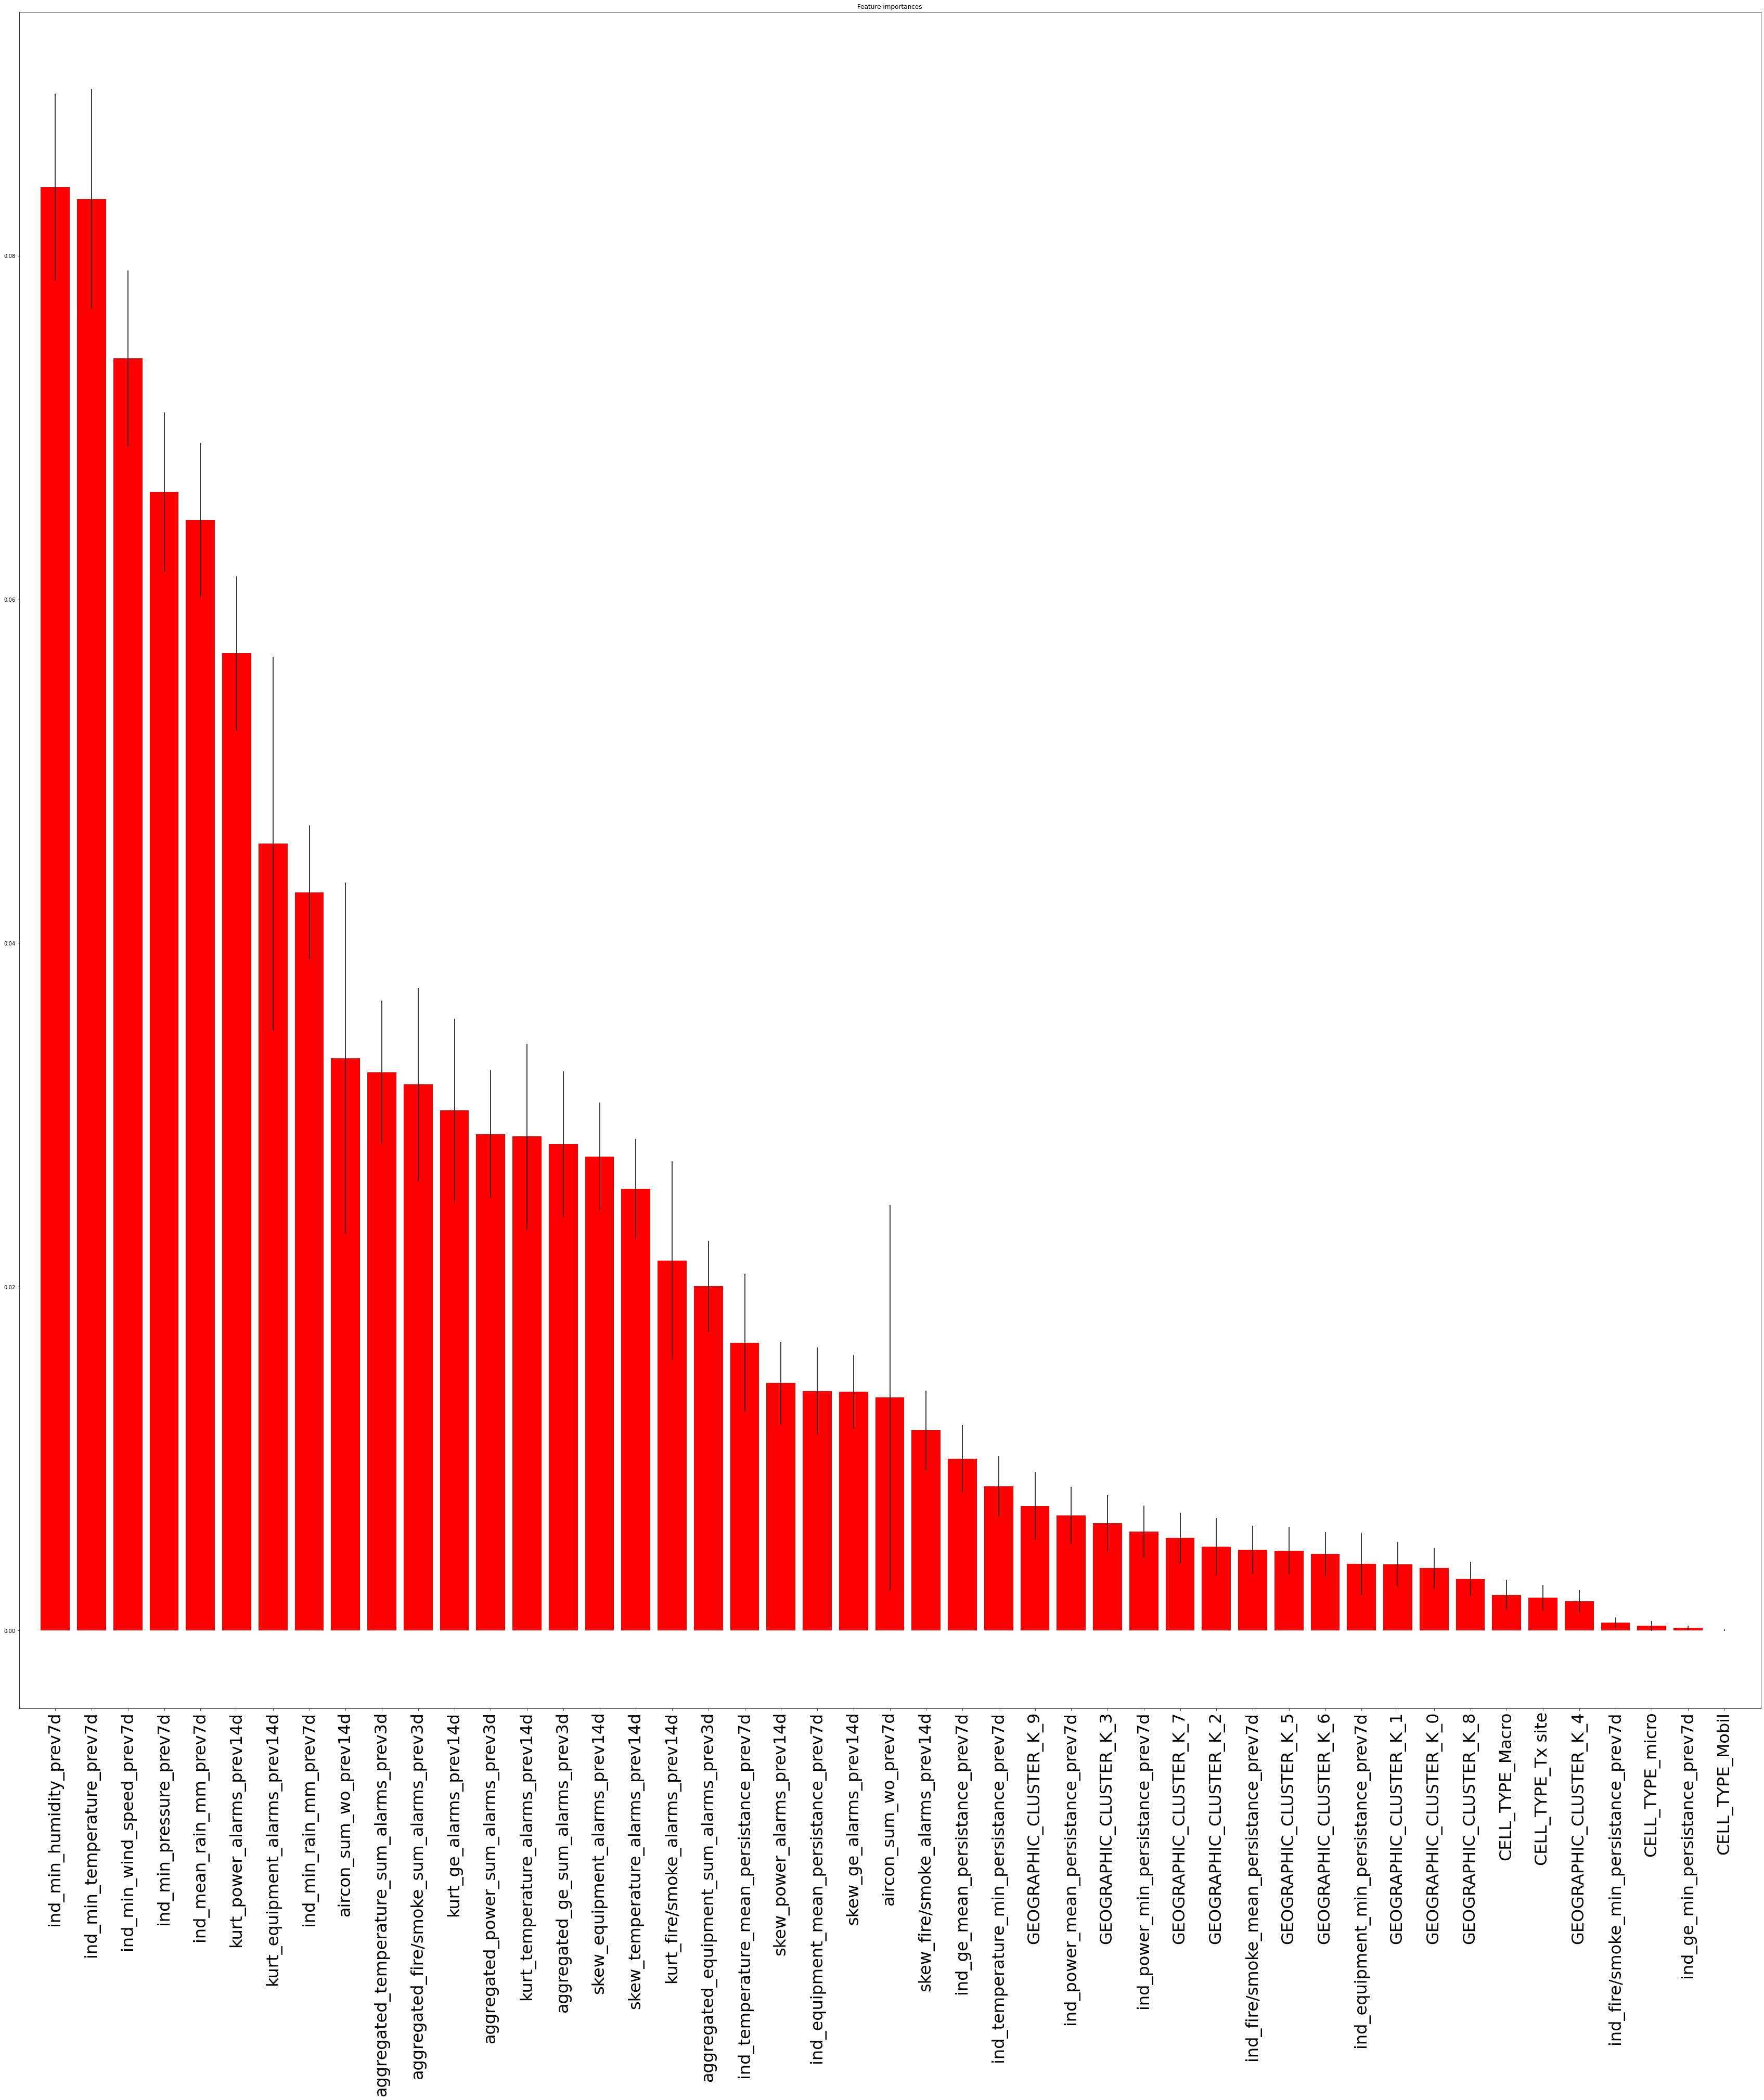

In [26]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
columns_name = []
# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    columns_name.append(X_origin_df.columns[indices[f]])
    print("%2d. feature %2d %7s (%.3f)" % (f + 1, indices[f], X_origin_df.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize = (60,60))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), columns_name,rotation=90, fontsize = 32)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [27]:
feature_selection_model = SelectFromModel(forest, prefit=True)

In [28]:
X_selected_features_forest = feature_selection_model.transform(np.array(df_oversampled[input_variables]))
X_selected_features_forest.shape

(532391, 18)

At this point, it would be interesting to compare the performance of our target algorithm on the reduced datasets.

In [40]:
# forest_model = linear_model.LogisticRegression()
# forest_scores = cross_val_score(forest_model, X_selected_features_forest, df_oversampled[target_variable], cv=kfold)
# print("RF Selected Features Model R2 Mean %.3f StdDev %.3f"%(forest_scores.mean(),forest_scores.std()))
evaluate_base_line(df_oversampled, X_selected_features_forest, True)

f1 Mean 0.799 StdDev 0.002


# VarianceThreshold

In [41]:
feature_selection_variance_model = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_selected_features_variance = feature_selection_variance_model.fit_transform(X_origin_np)


mask = feature_selection_variance_model.get_support() #list of booleans
print("Reduced data set shape = ", X_selected_features_variance.shape)
print("     Selected features = ", input_variables[mask])
print("      Deleted Features = ", input_variables[~mask])

Reduced data set shape =  (621300, 27)
     Selected features =  Index(['GEOGRAPHIC_CLUSTER_K_7', 'ind_temperature_min_persistance_prev7d',
       'ind_temperature_mean_persistance_prev7d',
       'ind_power_mean_persistance_prev7d', 'ind_ge_mean_persistance_prev7d',
       'ind_equipment_mean_persistance_prev7d', 'ind_min_humidity_prev7d',
       'ind_min_pressure_prev7d', 'ind_min_rain_mm_prev7d',
       'ind_mean_rain_mm_prev7d', 'ind_min_temperature_prev7d',
       'ind_min_wind_speed_prev7d', 'aggregated_equipment_sum_alarms_prev3d',
       'aggregated_fire/smoke_sum_alarms_prev3d',
       'aggregated_ge_sum_alarms_prev3d', 'aggregated_power_sum_alarms_prev3d',
       'aggregated_temperature_sum_alarms_prev3d',
       'skew_equipment_alarms_prev14d', 'skew_fire/smoke_alarms_prev14d',
       'skew_ge_alarms_prev14d', 'skew_power_alarms_prev14d',
       'skew_temperature_alarms_prev14d', 'kurt_equipment_alarms_prev14d',
       'kurt_fire/smoke_alarms_prev14d', 'kurt_ge_alarms_prev14

In [42]:
evaluate_base_line(df_oversampled, input_variables[mask])

Variance Model R2 Mean 0.823 StdDev 0.002
f1 Mean 0.784 StdDev 0.002


## PCA

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

full_pca_model = PCA()
X_std = StandardScaler().fit_transform(X_origin_np)
full_fitted_model = full_pca_model.fit(X_std)

In [44]:
full_fitted_model.explained_variance_ratio_.shape

(47,)

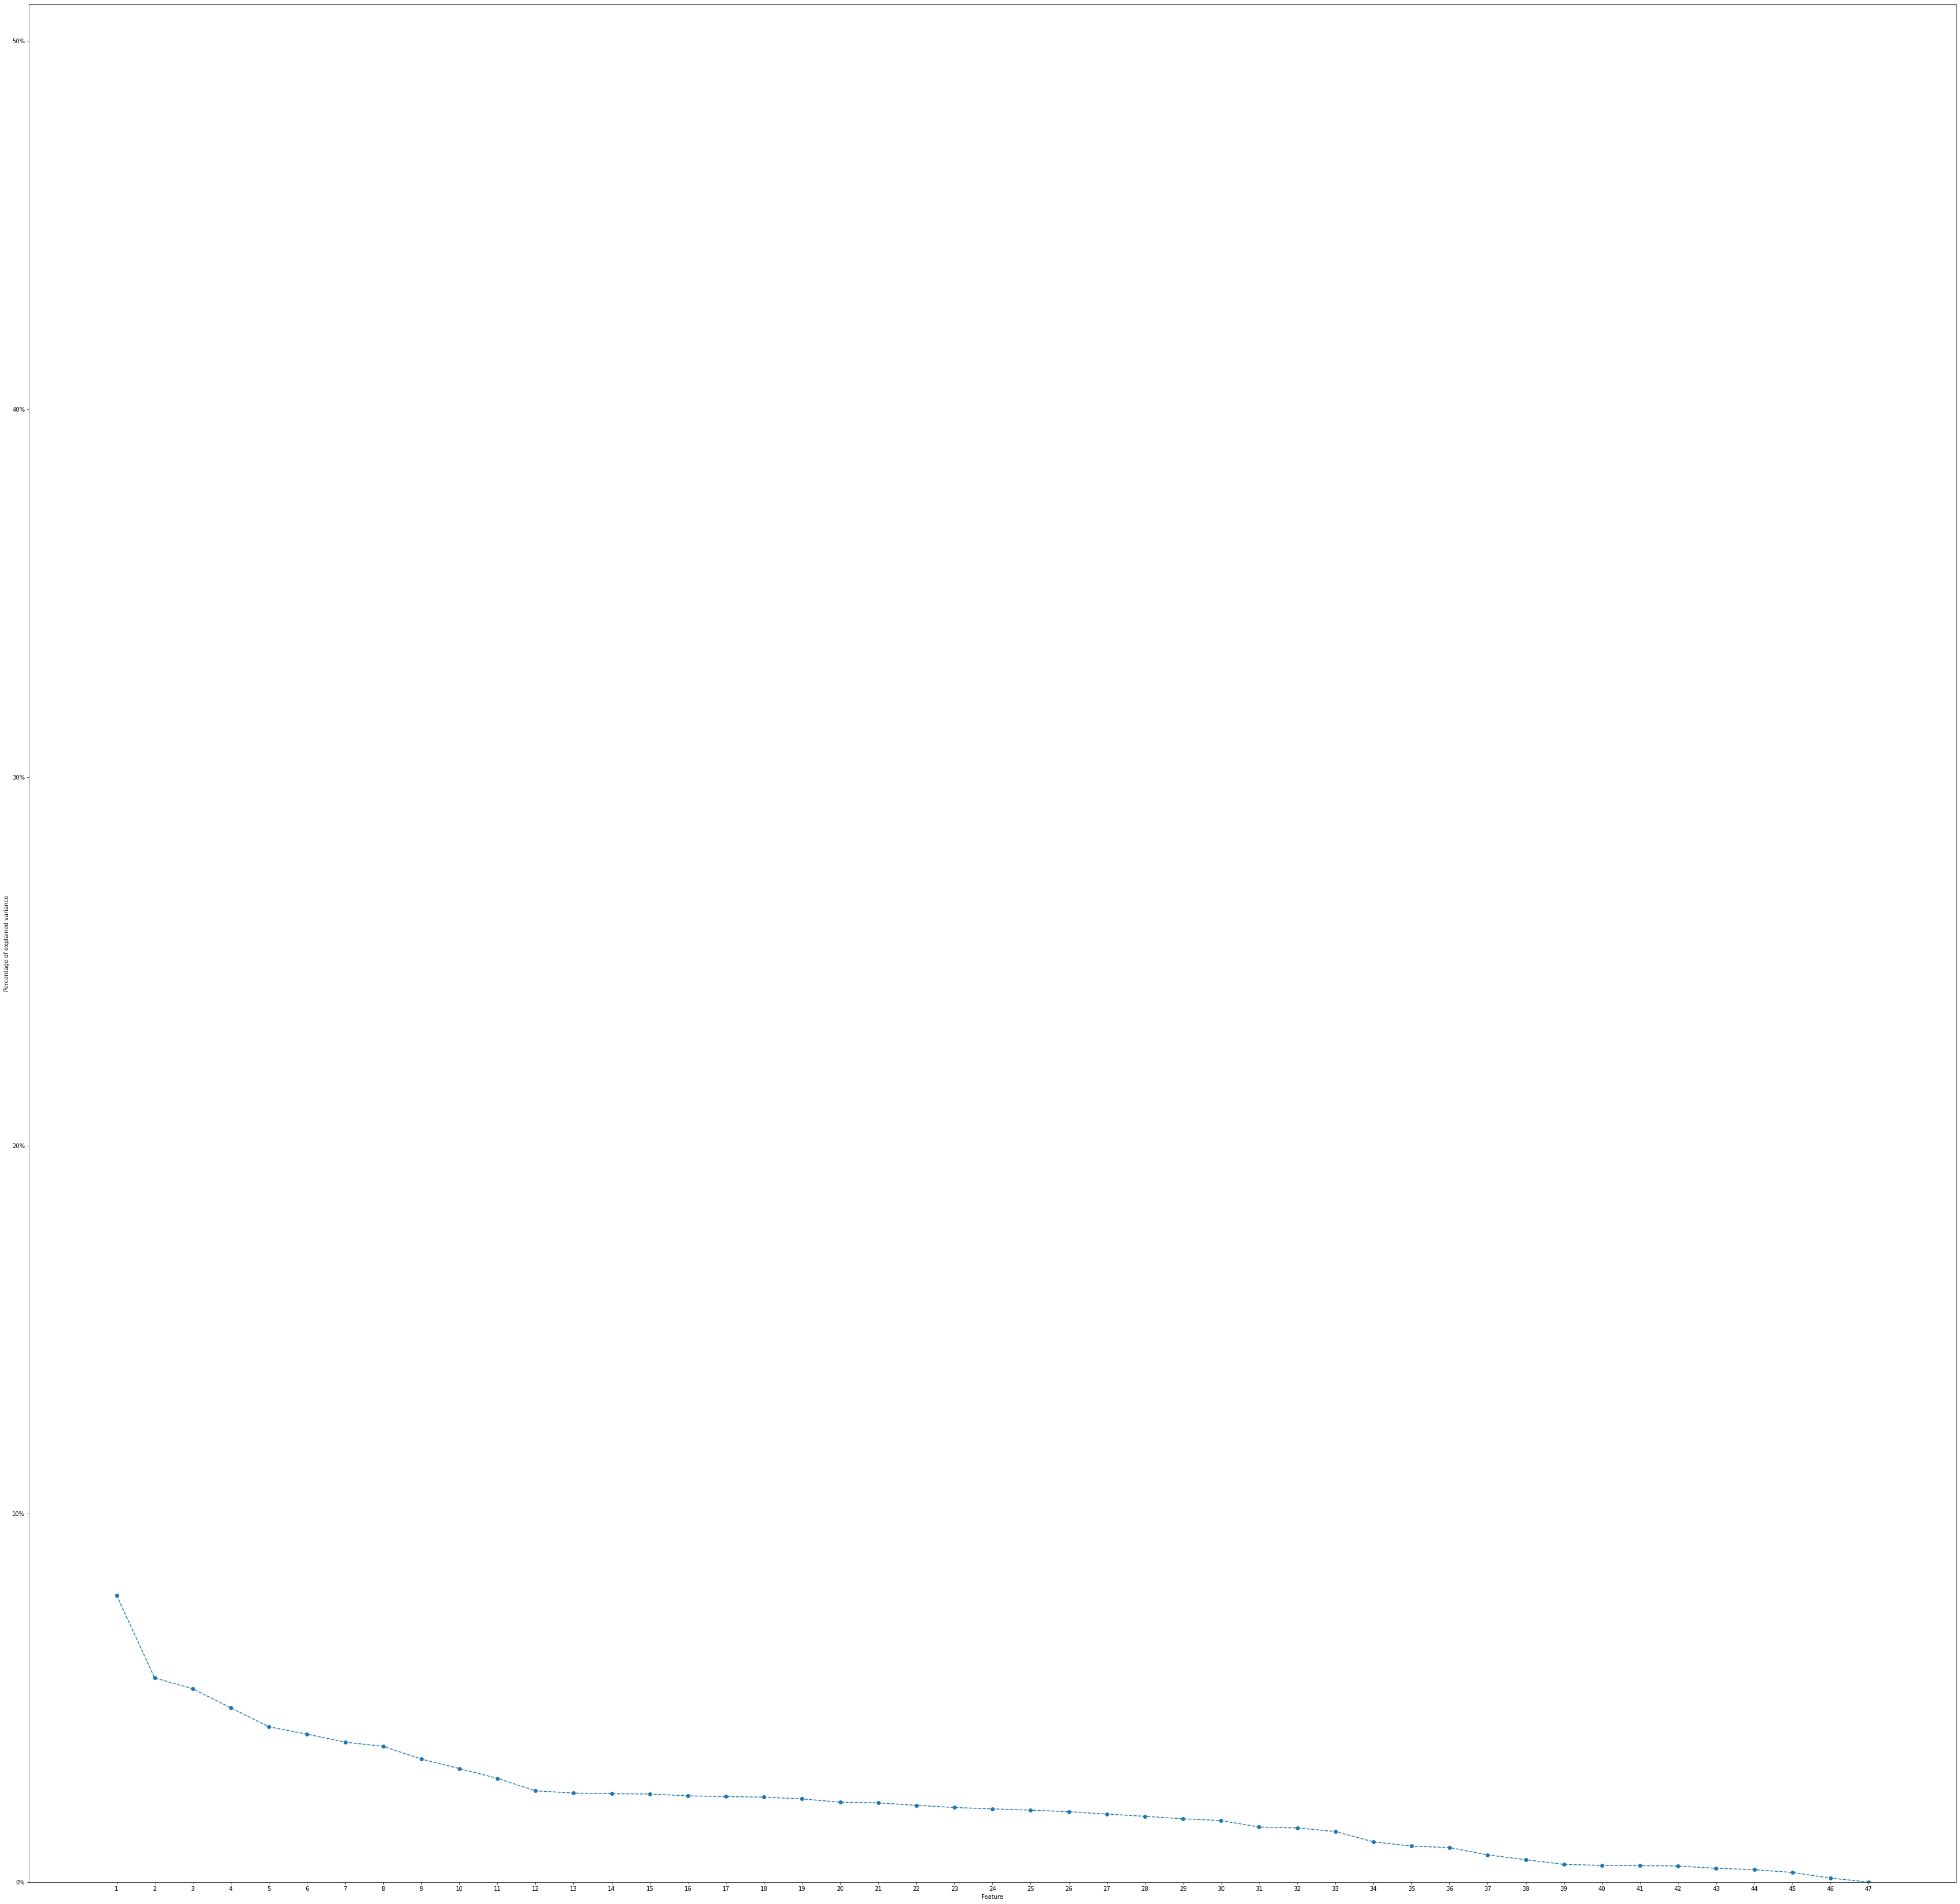

In [46]:
plt.figure(figsize=(60, 60));
plt.plot(full_fitted_model.explained_variance_ratio_, '--o');
plt.xticks(np.arange(0,47,1),labels=np.arange(1,48,1));
plt.xlabel("Feature");
plt.ylabel("Percentage of explained variance");
plt.xticks(np.arange(0,47,1),labels=np.arange(1,48,1));
plt.yticks(np.arange(0.0,0.51,.1),labels=["%.0f%%"%(x*100) for x in np.arange(0.0,0.51,.1)]);
plt.ylim([0.0,0.51]);


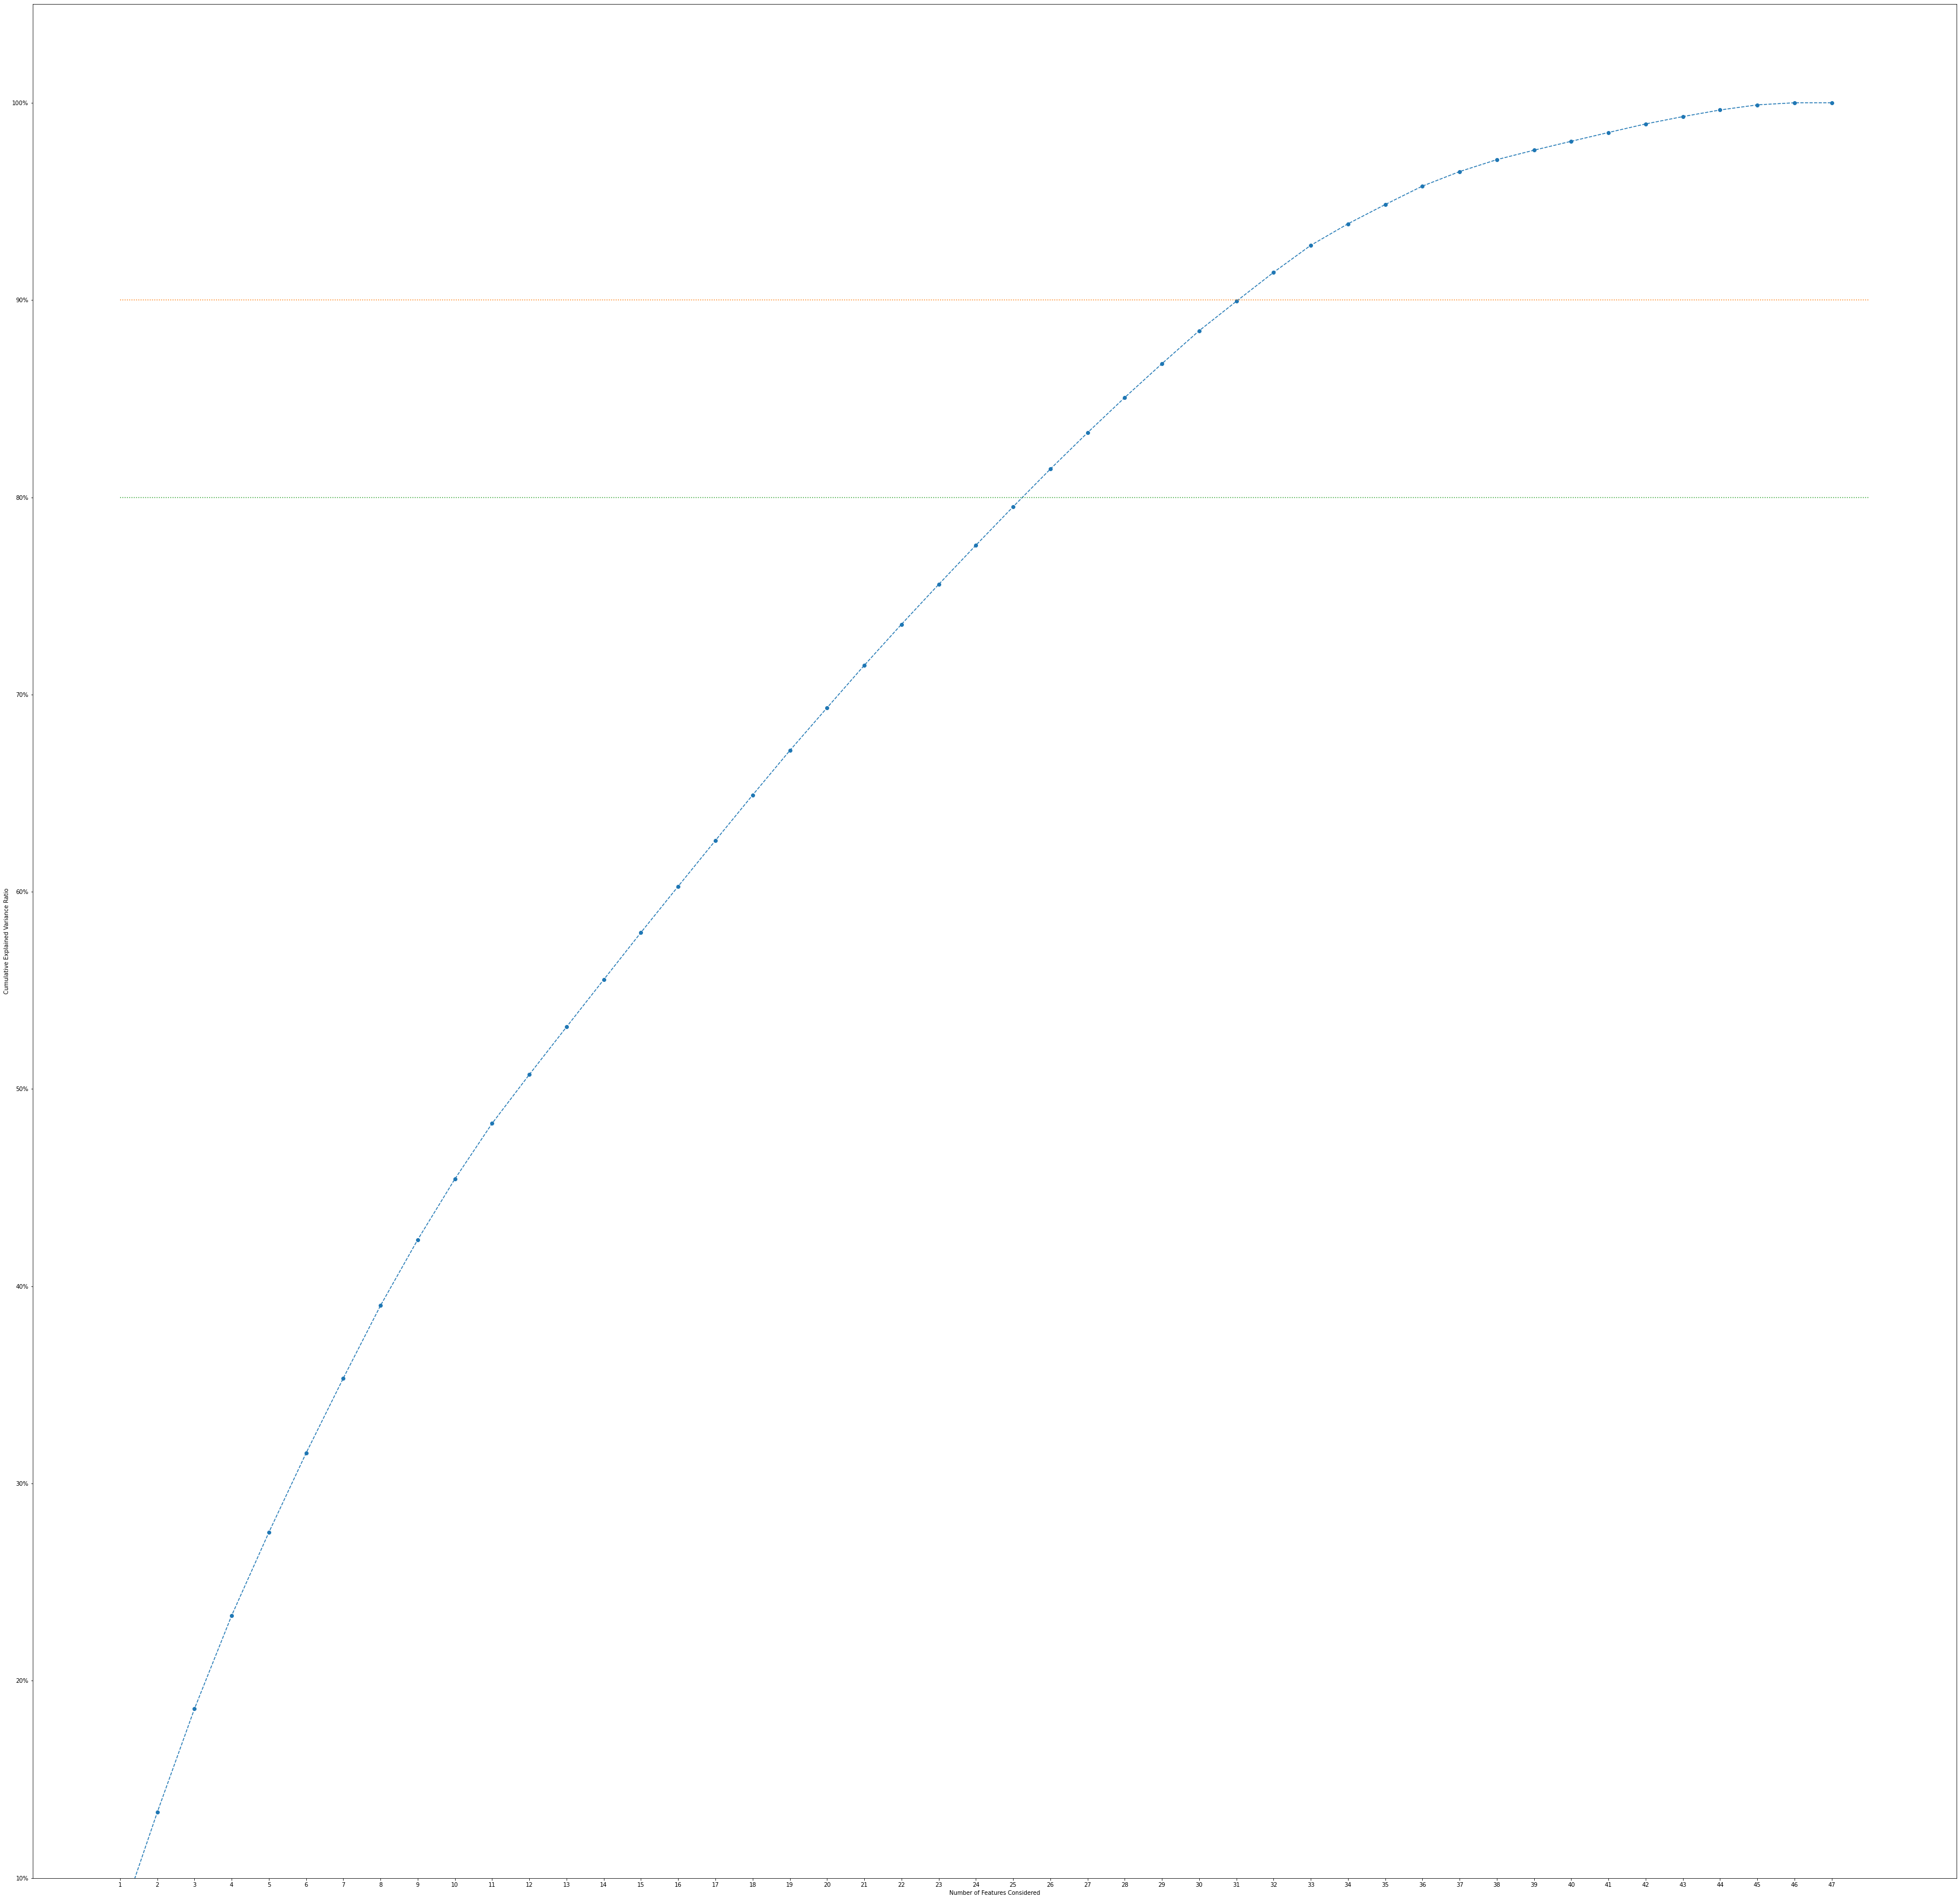

In [47]:
plt.figure(figsize=(60, 60));

plt.plot(full_fitted_model.explained_variance_ratio_.cumsum(), '--o');
plt.xticks(np.arange(0,47,1),labels=np.arange(1,48,1));
plt.yticks(np.arange(0.1,1.1,.1),labels=["%.0f%%"%(x*100) for x in np.arange(0.1,1.1,.1)]);
plt.ylim([0.1,1.05]);
plt.plot([0,47],[.9,.9],':');
plt.plot([0,47],[.8,.8],':');
plt.xlabel("Number of Features Considered");
plt.ylabel("Cumulative Explained Variance Ratio");


In [48]:
feature_selection_pca_model = PCA(n_components=32)
fitted_model = feature_selection_pca_model.fit(X_std)

X_selected_features_pca = fitted_model.transform(np.array(df_oversampled[input_variables]))
print("    Explained Variance = %.3f" % fitted_model.explained_variance_ratio_.cumsum()[-1])
print("Reduced data set shape =",X_selected_features_pca.shape)

    Explained Variance = 0.914
Reduced data set shape = (532391, 32)


In [57]:
X_selected_features_pca_original = fitted_model.transform(np.array(X_origin_df))

In [59]:
np.savetxt("PCS_origin.csv", X_selected_features_pca_original, delimiter=",")

In [49]:
evaluate_base_line(df_oversampled, X_selected_features_pca, True)

PCA Model R2 Mean 0.842 StdDev 0.001
f1 Mean 0.810 StdDev 0.002


In [56]:
np.savetxt("PCS.csv", X_selected_features_pca, delimiter=",")

# K-Best

In [51]:
# Feature Selection
X_origin_norm = normalizer_df(X_origin_df,False,False, (0,1))
selector= SelectKBest(chi2,k=30).fit(X_origin_norm,y_origin_np)

# Get idxs of columns to keep
idxs_selected= selector.get_support(indices=True)
idxs_selected
input_variables[idxs_selected]

Index(['CELL_TYPE_Macro', 'CELL_TYPE_Tx site', 'CELL_TYPE_micro',
       'GEOGRAPHIC_CLUSTER_K_0', 'GEOGRAPHIC_CLUSTER_K_1',
       'GEOGRAPHIC_CLUSTER_K_3', 'GEOGRAPHIC_CLUSTER_K_4',
       'GEOGRAPHIC_CLUSTER_K_5', 'GEOGRAPHIC_CLUSTER_K_7',
       'GEOGRAPHIC_CLUSTER_K_8', 'GEOGRAPHIC_CLUSTER_K_9',
       'aircon_sum_wo_prev7d', 'aircon_sum_wo_prev14d',
       'ind_temperature_min_persistance_prev7d',
       'ind_temperature_mean_persistance_prev7d',
       'ind_power_min_persistance_prev7d', 'ind_power_mean_persistance_prev7d',
       'ind_ge_mean_persistance_prev7d',
       'ind_fire/smoke_min_persistance_prev7d',
       'ind_fire/smoke_mean_persistance_prev7d',
       'ind_equipment_min_persistance_prev7d',
       'ind_equipment_mean_persistance_prev7d', 'ind_min_rain_mm_prev7d',
       'ind_mean_rain_mm_prev7d', 'ind_min_temperature_prev7d',
       'aggregated_equipment_sum_alarms_prev3d',
       'aggregated_fire/smoke_sum_alarms_prev3d',
       'aggregated_ge_sum_alarms_prev3d',

In [52]:
train_data_selected=df_oversampled.loc[:,input_variables[idxs_selected]]

In [53]:
evaluate_base_line(df_oversampled, X_selected_features_pca, True)

Variance Model R2 Mean 0.842 StdDev 0.001
f1 Mean 0.810 StdDev 0.002


We can see that k-best and PCA works good with 30 features. 